# Heart Failure Prediction - Clinical Records using Machine Learning Algorithms

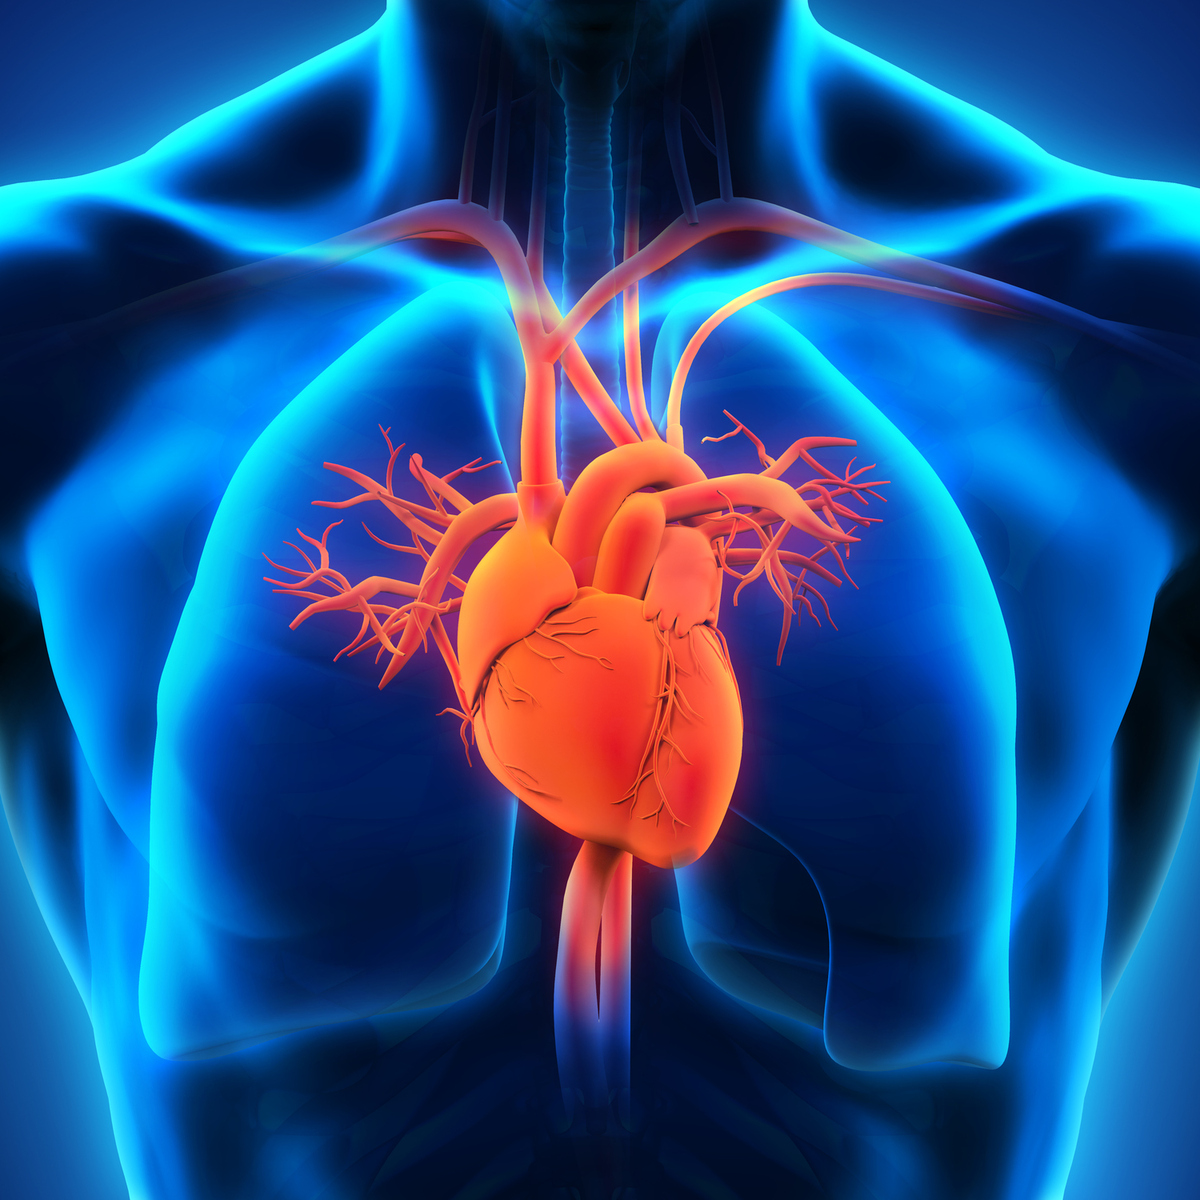

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('heart_failure.csv')

# Exploratory Data Analysis

In [4]:
df

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,45.0,0,582,1,55,0,543000.00,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.00,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.00,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [5]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,45.0,0,582,1,38,0,319000.00,0.9,140,0,0,244,0
3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1


In [6]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
4995,45.0,0,582,1,55,0,543000.0,1.0,132,0,0,250,0
4996,60.0,1,582,0,30,1,127000.0,0.9,145,0,0,95,0
4997,95.0,1,112,0,40,1,196000.0,1.0,138,0,0,24,1
4998,65.0,1,160,1,20,0,327000.0,2.7,116,0,0,8,1
4999,40.0,0,244,0,45,1,275000.0,0.9,140,0,0,174,0


In [7]:
df.shape

(5000, 13)

In [8]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [9]:
df.duplicated().sum()

3680

In [10]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       5000 non-null   float64
 1   anaemia                   5000 non-null   int64  
 2   creatinine_phosphokinase  5000 non-null   int64  
 3   diabetes                  5000 non-null   int64  
 4   ejection_fraction         5000 non-null   int64  
 5   high_blood_pressure       5000 non-null   int64  
 6   platelets                 5000 non-null   float64
 7   serum_creatinine          5000 non-null   float64
 8   serum_sodium              5000 non-null   int64  
 9   sex                       5000 non-null   int64  
 10  smoking                   5000 non-null   int64  
 11  time                      5000 non-null   int64  
 12  DEATH_EVENT               5000 non-null   int64  
dtypes: float64(3), int64(10)
memory usage: 507.9 KB


In [12]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,60.288736,0.474400,586.760600,0.439400,37.734600,0.364800,265075.404370,1.369106,136.808200,0.645600,0.311800,130.678800,0.313600
std,11.697243,0.499394,976.733979,0.496364,11.514855,0.481422,97999.758622,1.009750,4.464236,0.478379,0.463275,77.325928,0.464002
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.000000,0.000000,4.000000,0.000000
25%,50.000000,0.000000,121.000000,0.000000,30.000000,0.000000,215000.000000,0.900000,134.000000,0.000000,0.000000,74.000000,0.000000
50%,60.000000,0.000000,248.000000,0.000000,38.000000,0.000000,263358.030000,1.100000,137.000000,1.000000,0.000000,113.000000,0.000000
75%,68.000000,1.000000,582.000000,1.000000,45.000000,1.000000,310000.000000,1.400000,140.000000,1.000000,1.000000,201.000000,1.000000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.000000,1.000000,285.000000,1.000000


In [13]:
df.nunique()

age                          48
anaemia                       2
creatinine_phosphokinase    290
diabetes                      2
ejection_fraction            17
high_blood_pressure           2
platelets                   203
serum_creatinine             43
serum_sodium                 27
sex                           2
smoking                       2
time                        155
DEATH_EVENT                   2
dtype: int64

In [14]:
# print how many object types and numerical types we are having in the data
# object means text
object_columns = df.select_dtypes(include = ['object']).columns
print('Object type columns')
print(object_columns)
numerical_columns = df.select_dtypes(include = ['int64' , 'float64']).columns
print('\nNumerical type columns')
print(numerical_columns)

Object type columns
Index([], dtype='object')

Numerical type columns
Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')


# using a functiom classify_featues classify the data into categorical ,non categorical , discrete , continuous

In [15]:
def classify_featues(df):
    categorical_features = []
    non_categorical_features = []
    discrete_features = []
    continuous_features = []
    for column in df.columns:
        if df[column].dtype == 'object':
            if df[column].nunique() < 10:
                categorical_features.append(column)
            else:
                non_categorical_features.append(column)
        elif df[column].dtype in ['int64']:
             if df[column].nunique() < 10:
                discrete_features.append(column)
             else:
                continuous_features.append(column)
    return categorical_features , non_categorical_features , discrete_features , continuous_features

In [16]:
categorical , non_categorical , discrete , continuous = classify_featues(df)

In [17]:
print('categorical_features' , categorical)
print('non_categorical_features' ,non_categorical )
print('discrete_features' , discrete)
print('continuous_features' , continuous)
# there is no object type of data so there will bo elements in categorical_features , non_categorical_features

categorical_features []
non_categorical_features []
discrete_features ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
continuous_features ['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']


In [18]:
# print the values and unique values in discrete
for i in discrete:
    print(i)
    print(df[i].unique())
    print()

anaemia
[0 1]

diabetes
[0 1]

high_blood_pressure
[0 1]

sex
[1 0]

smoking
[1 0]

DEATH_EVENT
[0 1]



In [19]:
# printing value counts of each of them
for i in discrete:
    print(df[i].value_counts())
    print()

anaemia
0    2628
1    2372
Name: count, dtype: int64

diabetes
0    2803
1    2197
Name: count, dtype: int64

high_blood_pressure
0    3176
1    1824
Name: count, dtype: int64

sex
1    3228
0    1772
Name: count, dtype: int64

smoking
0    3441
1    1559
Name: count, dtype: int64

DEATH_EVENT
0    3432
1    1568
Name: count, dtype: int64



In [20]:
df_new = df.copy()

In [21]:
df_new  = df_new.drop_duplicates()

In [22]:

for i in discrete:
    print(df_new[i].value_counts())
    print()

anaemia
0    679
1    641
Name: count, dtype: int64

diabetes
0    730
1    590
Name: count, dtype: int64

high_blood_pressure
0    832
1    488
Name: count, dtype: int64

sex
1    852
0    468
Name: count, dtype: int64

smoking
0    914
1    406
Name: count, dtype: int64

DEATH_EVENT
0    923
1    397
Name: count, dtype: int64



# even after droping ythe dups we r having unbalanced/biased data

# data cleaning

In [23]:
df = df.drop_duplicates()

# Data Visulalization

# discrete/ categorical = count plot and pie plot
# continuos = histgram , boxplot

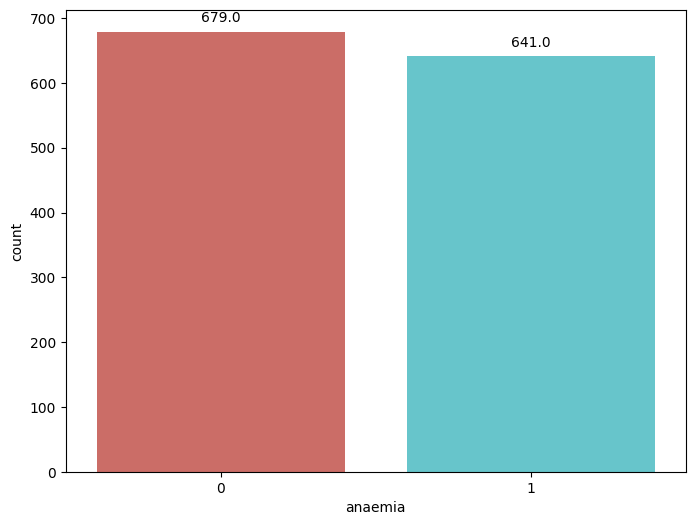

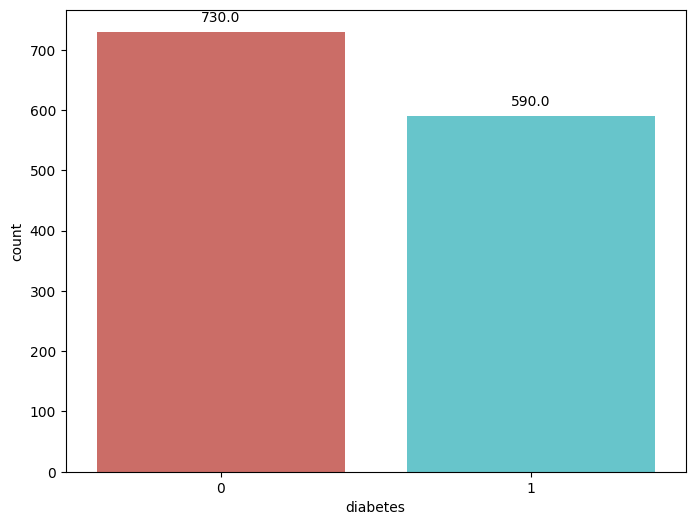

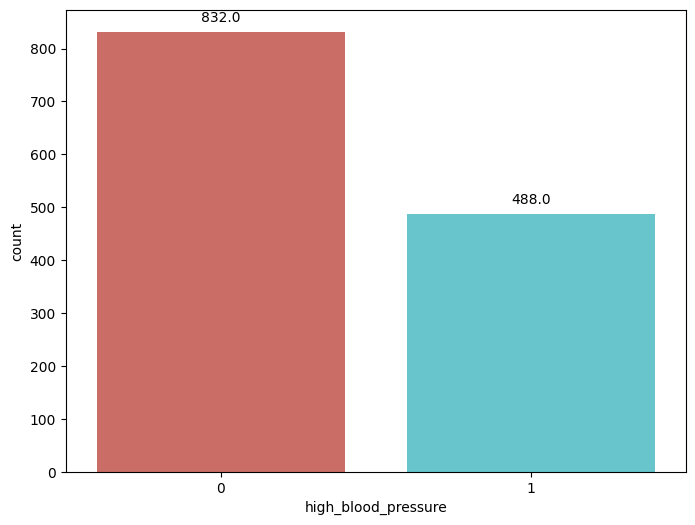

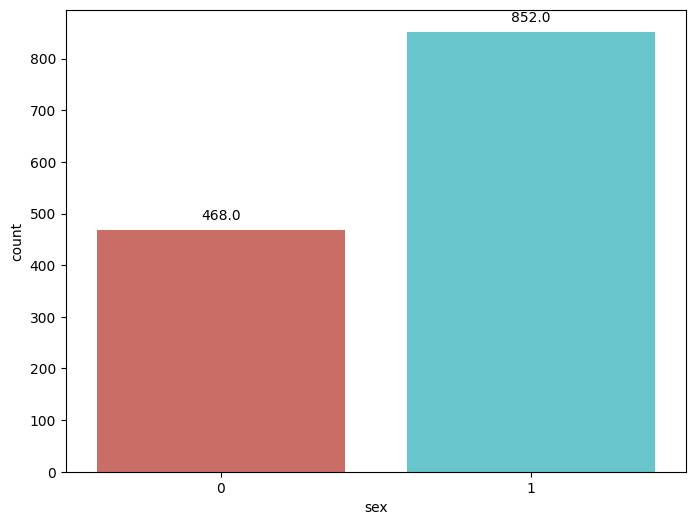

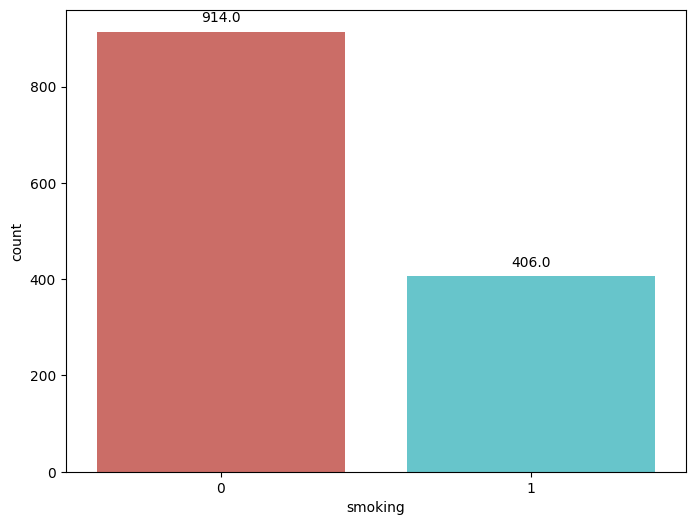

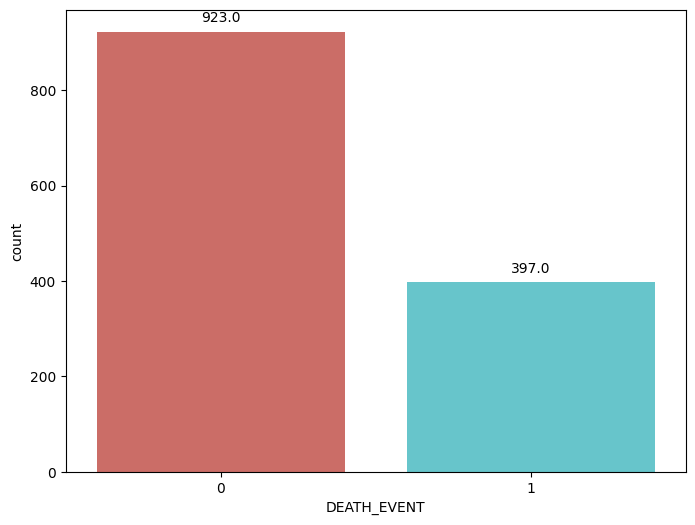

In [24]:
for i in discrete:
    plt.figure(figsize = (8,6))
    ax = sns.countplot(x = i , data = df , palette = 'hls')
    for p in ax.patches:
        height = p.get_height()
        ax.annotate(f'{height}',
                   xy = (p.get_x() + p.get_width() / 2.,height) , 
                   xytext = (0 , 10) ,
                   textcoords = 'offset points',
                   ha = 'center' , va = 'center')
    plt.show()

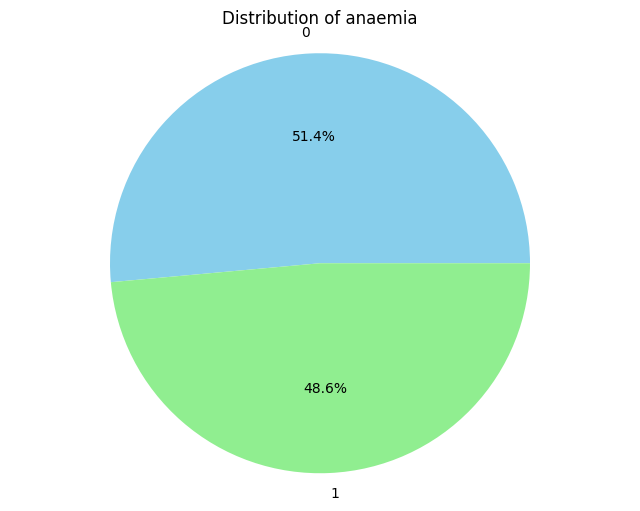

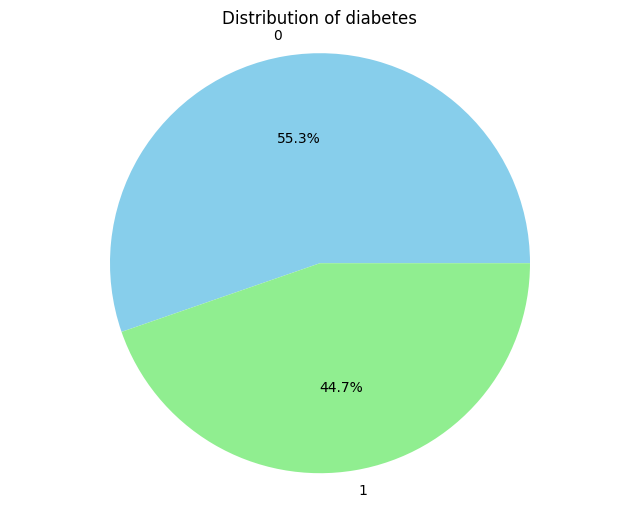

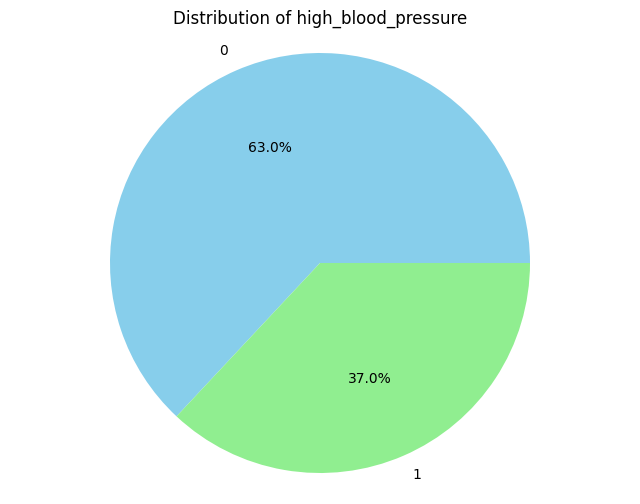

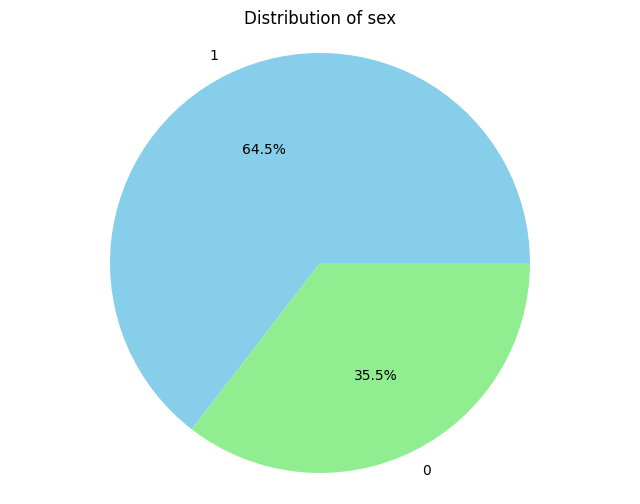

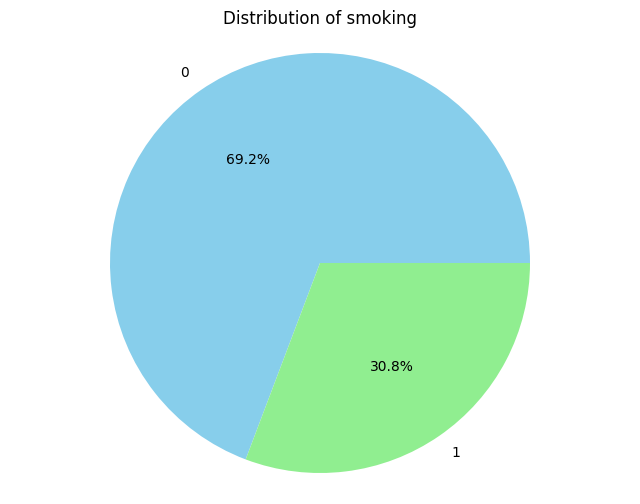

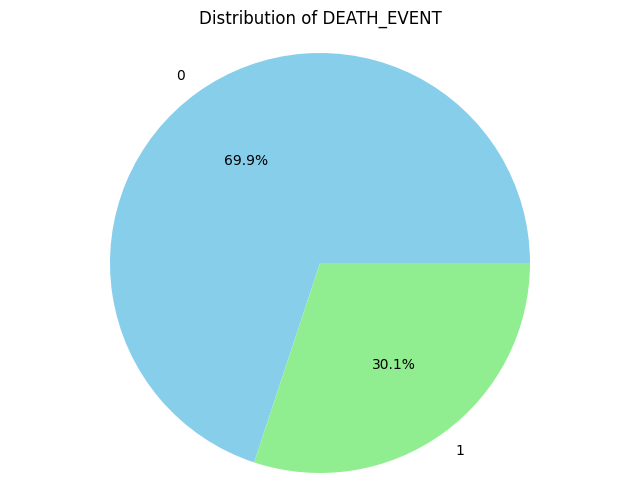

In [25]:
for i in discrete:
    plt.figure(figsize = (8,6))
    counts = df[i].value_counts()
    plt.pie(counts , labels = counts.index , autopct = '%1.1f%%' , colors = ['skyblue','lightgreen'])
    plt.title(f'Distribution of {i}')
    plt.axis('equal')
    plt.show()

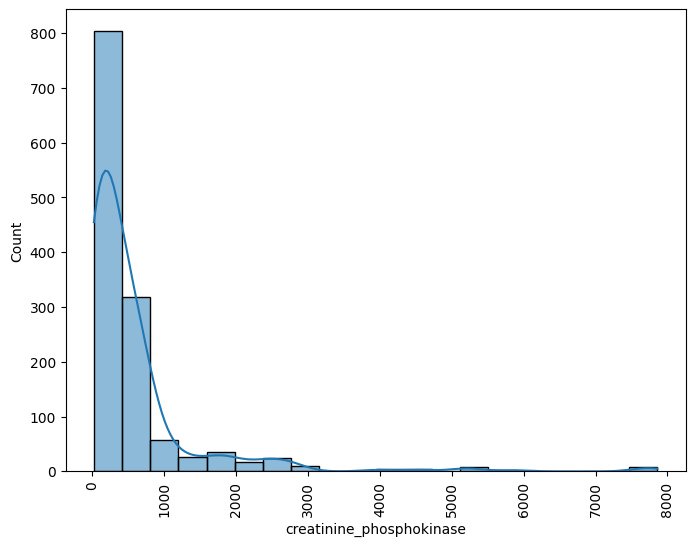

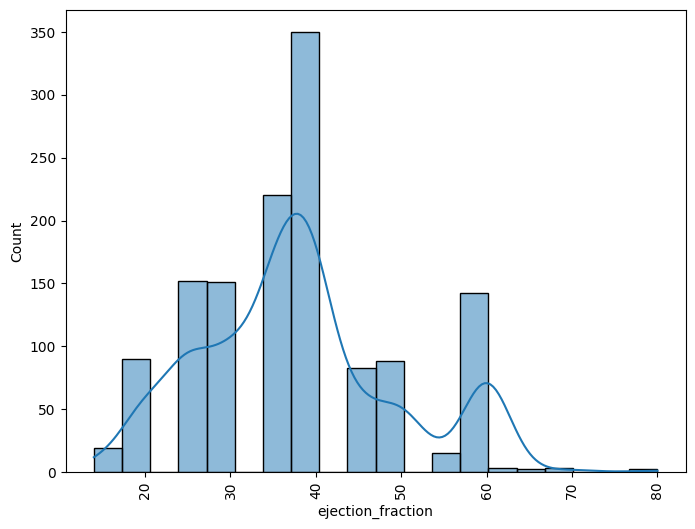

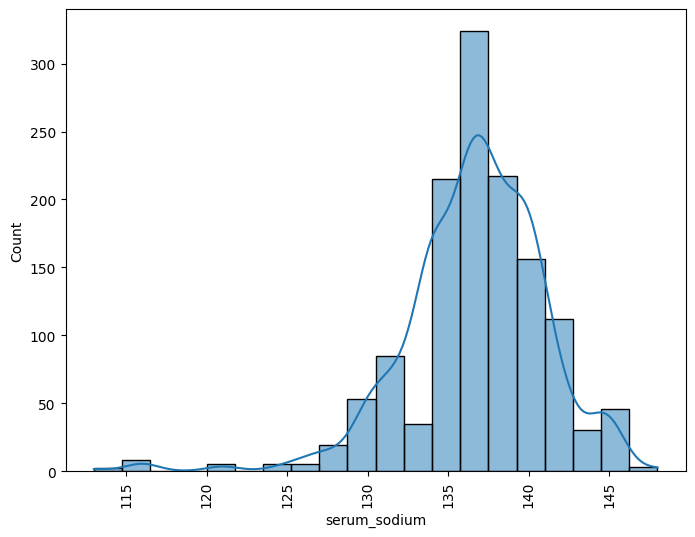

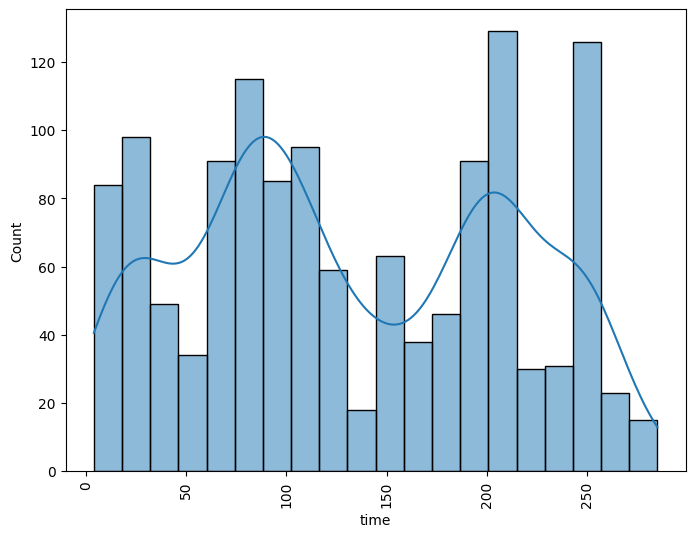

In [26]:
for i in continuous:
    plt.figure(figsize = (8,6))
    sns.histplot(df[i] , bins = 20 , kde = True , palette = 'hls')
    plt.xticks(rotation = 90)
    plt.show()

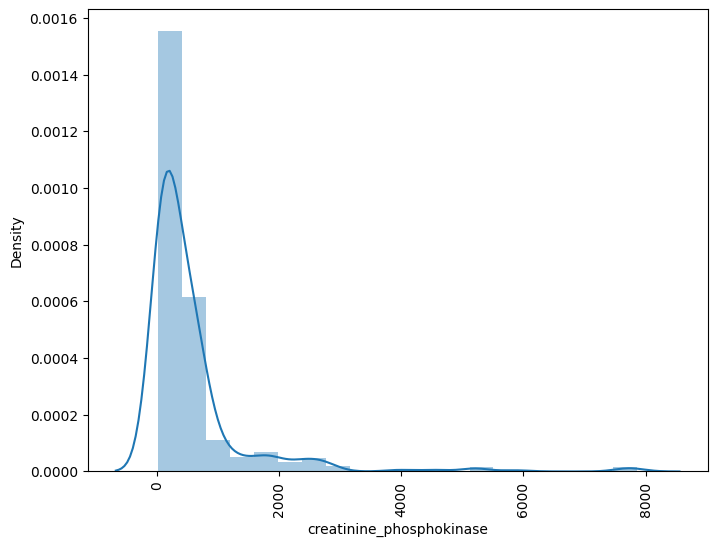

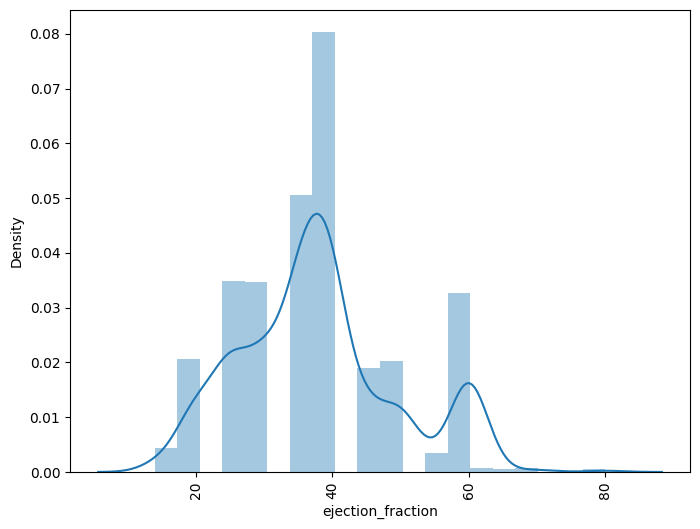

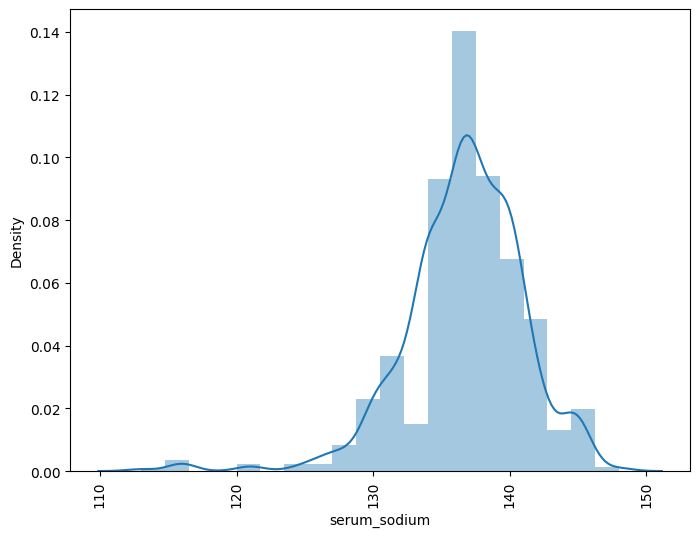

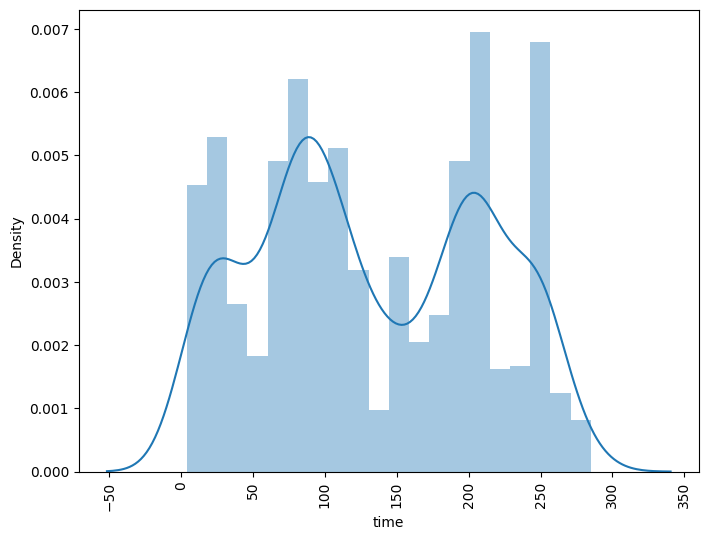

In [27]:
# these is the code for dist(distribution) plot
for i in continuous:
    plt.figure(figsize = (8,6))
    sns.distplot(df[i] , bins = 20 , kde = True )
    plt.xticks(rotation = 90)
    plt.show()

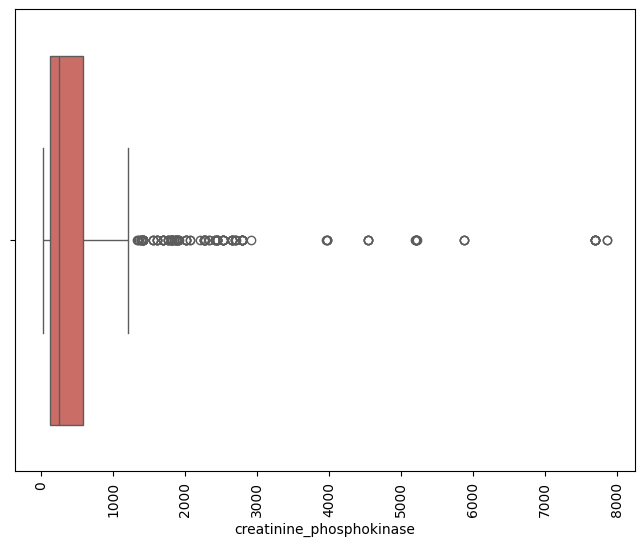

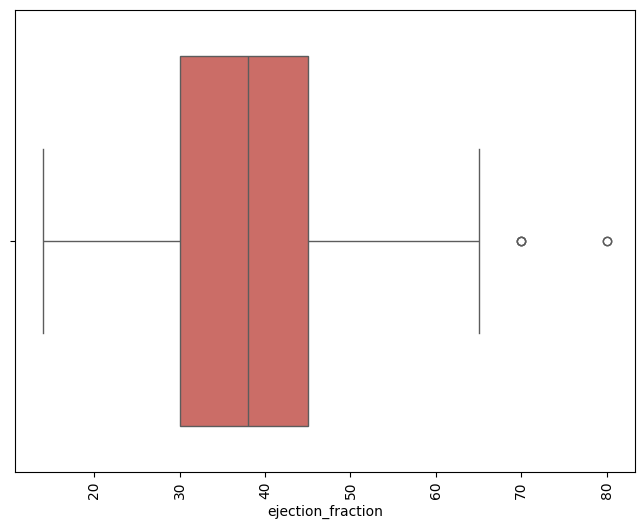

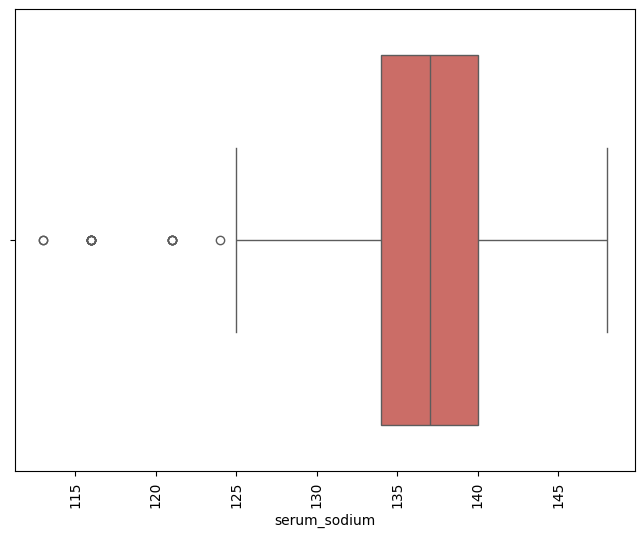

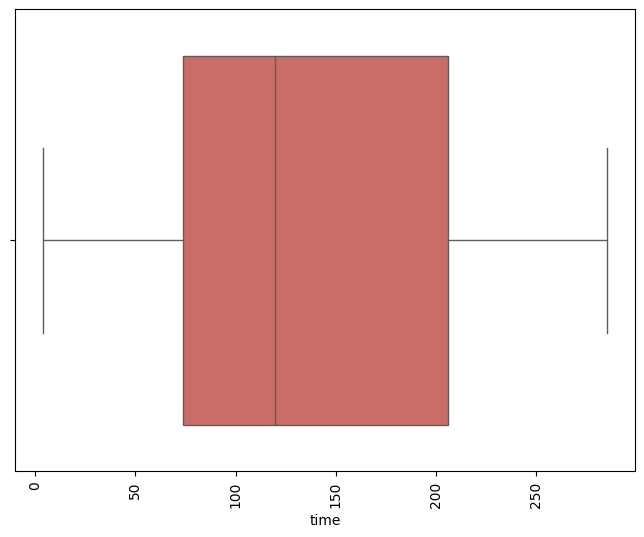

In [28]:
for i in continuous:
    plt.figure(figsize = (8,6))
    sns.boxplot(x = i , data = df , palette = 'hls' )
    plt.xticks(rotation = 90)
    plt.show()

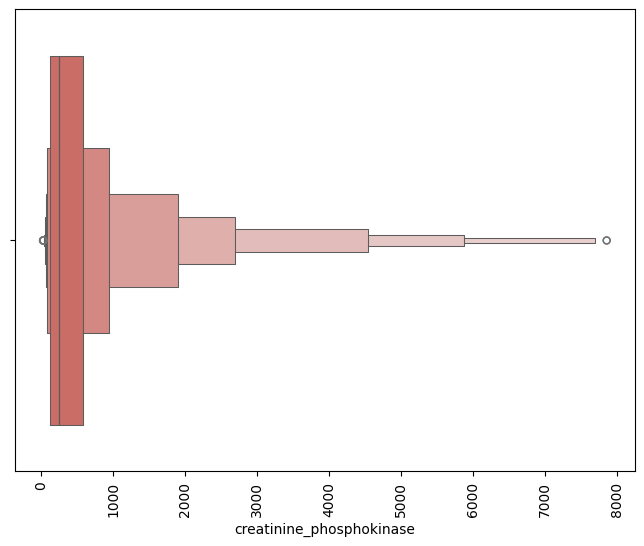

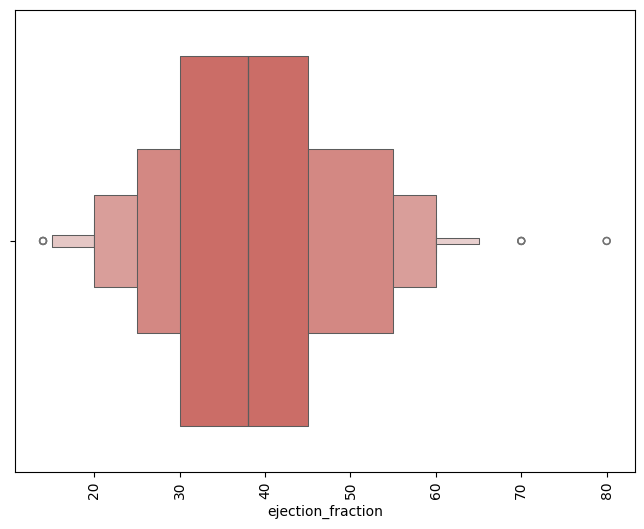

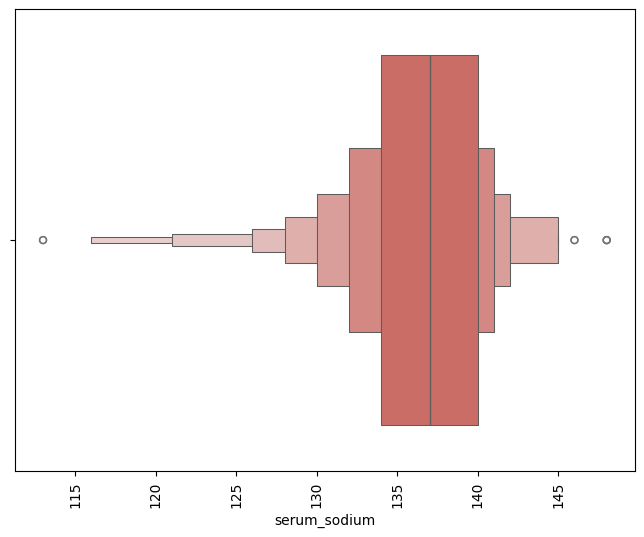

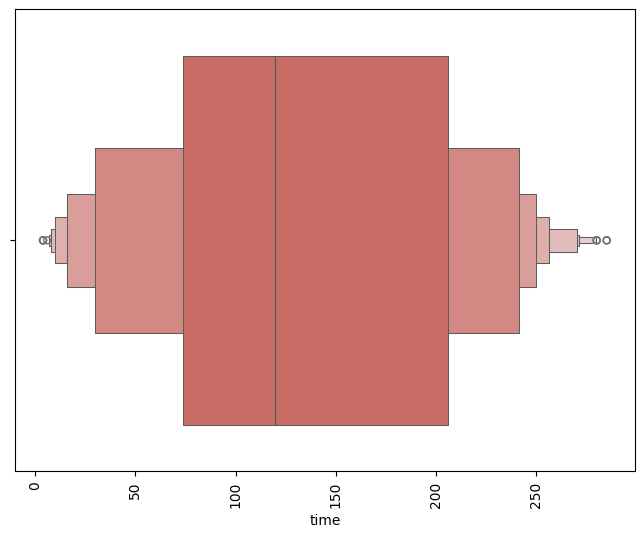

In [29]:
for i in continuous:
    plt.figure(figsize = (8,6))
    sns.boxenplot(x = i , data = df , palette = 'hls' )
    plt.xticks(rotation = 90)
    plt.show()

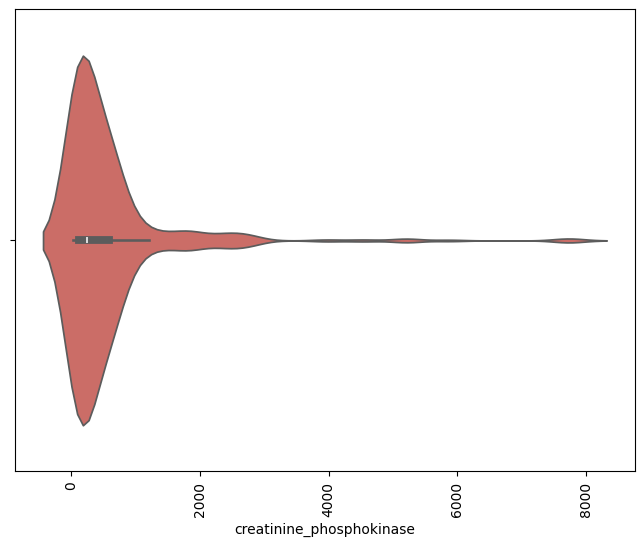

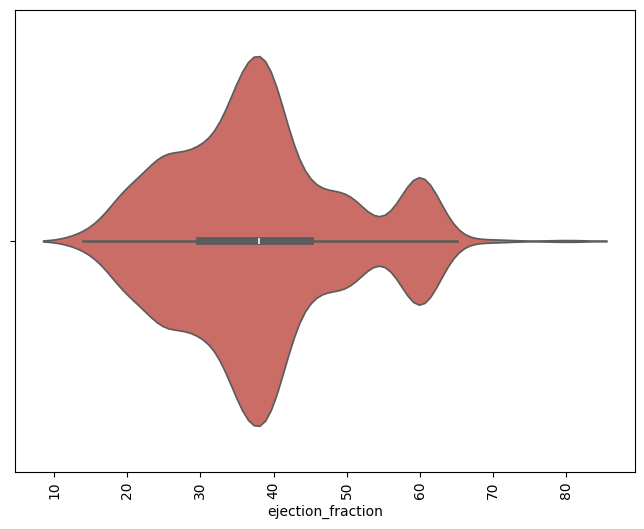

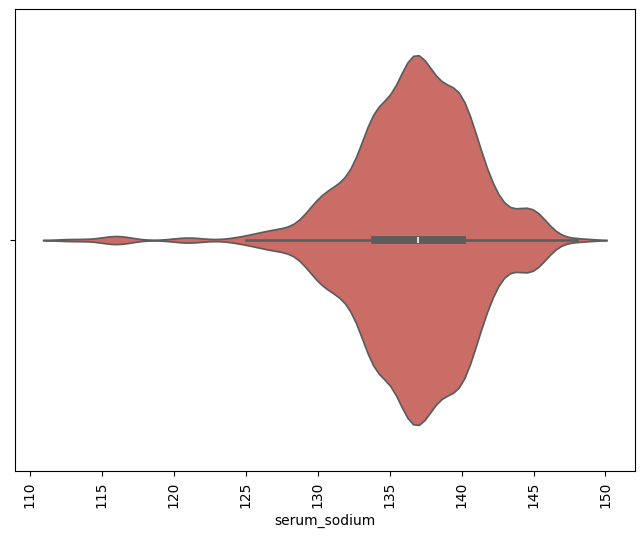

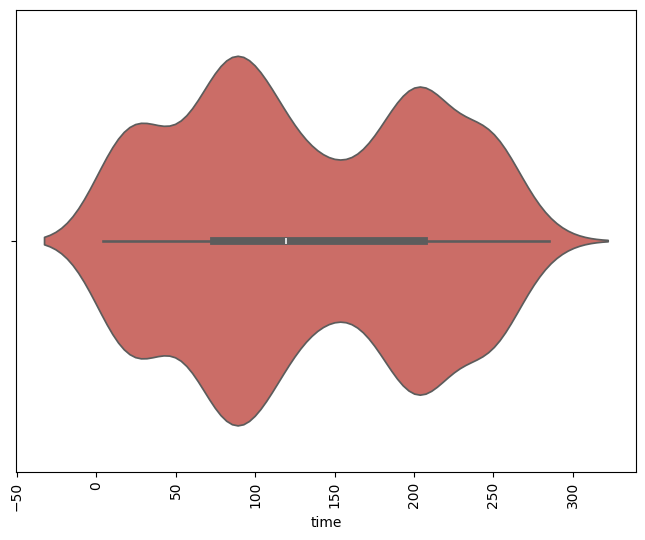

In [30]:
for i in continuous:
    plt.figure(figsize = (8,6))
    sns.violinplot(x = i , data = df , palette = 'hls' )
    plt.xticks(rotation = 90)
    plt.show()

# till now we have done univariant visulaization we will do bivariant analysis

In [31]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [32]:
categorical_features =  []
non_categorical_features = []
discrete_features = ['anaemia', 'diabetes', 'high_blood_pressure', 'sex', 'smoking', 'DEATH_EVENT']
continuous_features  = ['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']
target = "DEATH_EVENT"

# taking count plot of each feature with respect to the tartget(hue = target)

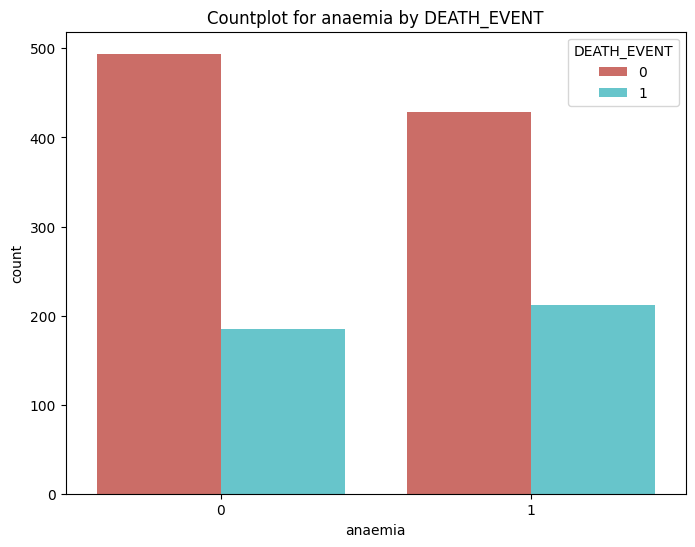

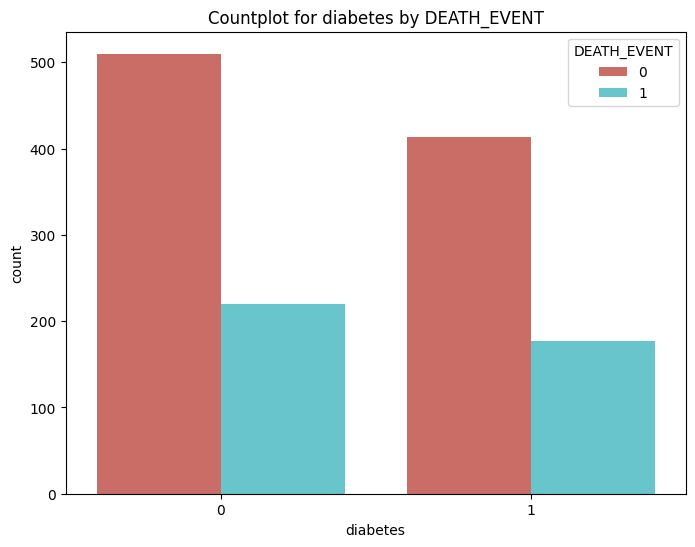

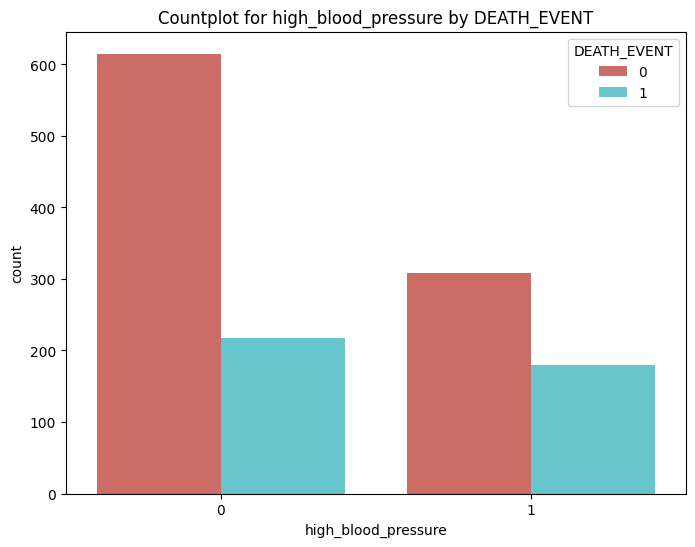

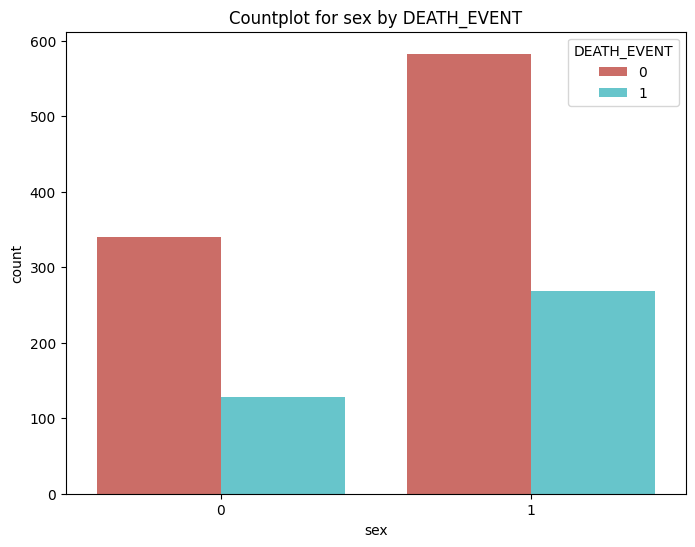

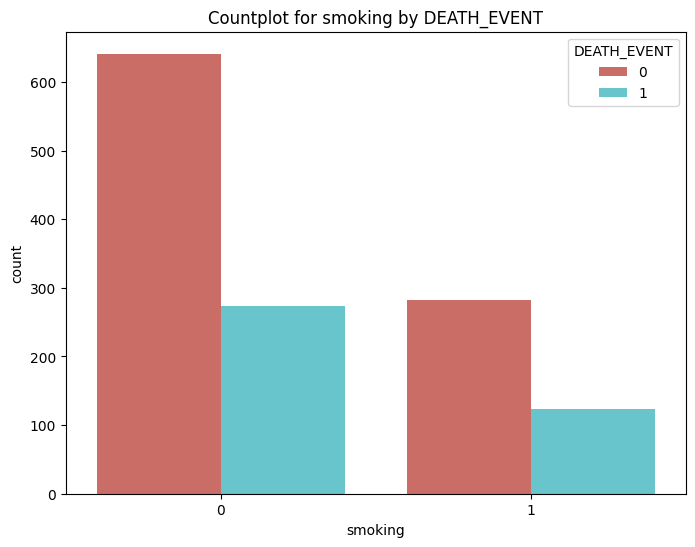

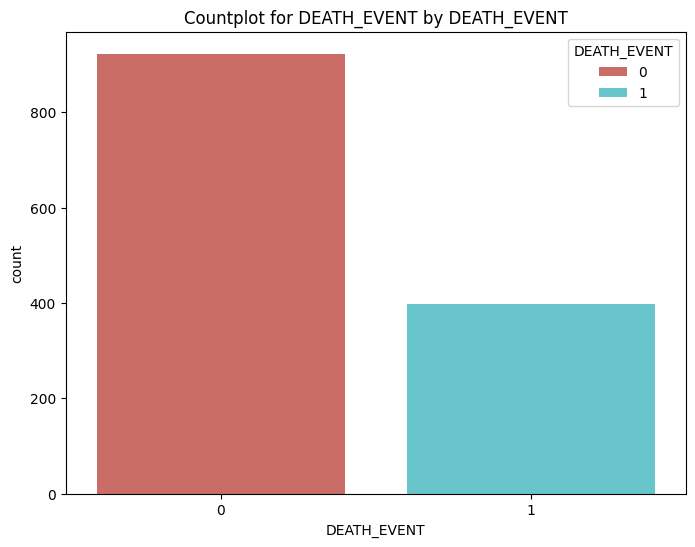

In [33]:
for feature in discrete_features:
    plt.figure(figsize=(8,6))
    sns.countplot(x = feature , hue = target ,data = df , palette = 'hls')
    plt.title(f'Countplot for {feature} by {target}')
    plt.show()

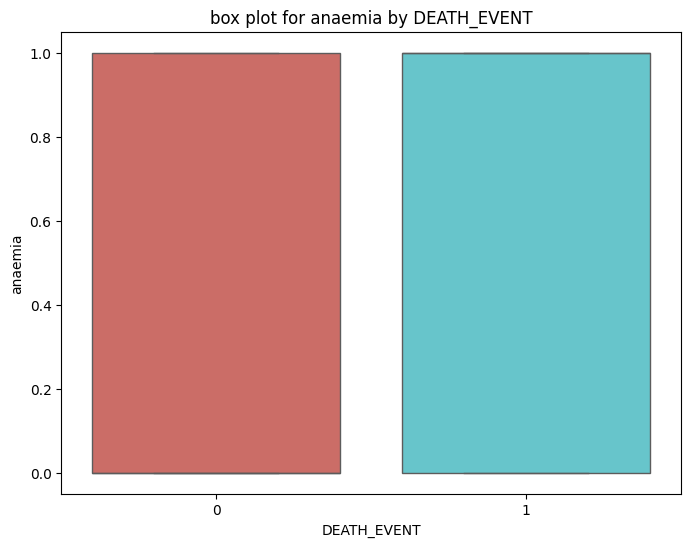

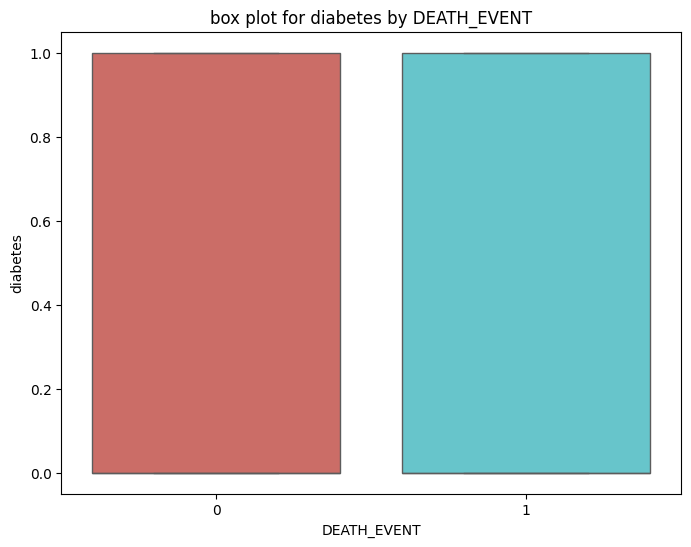

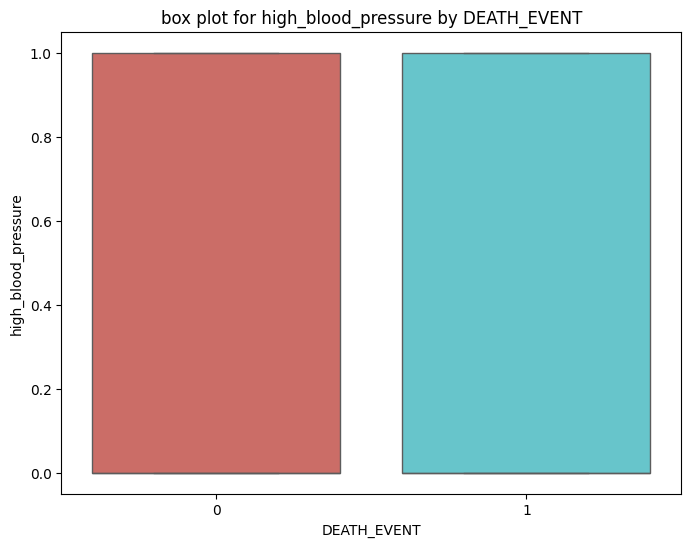

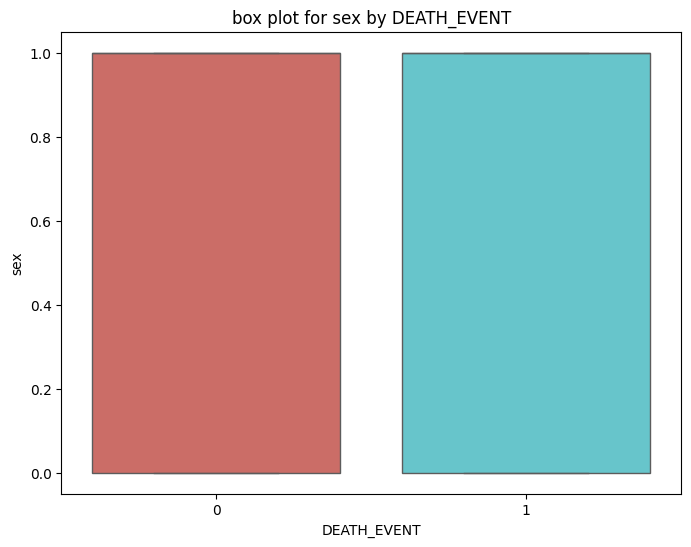

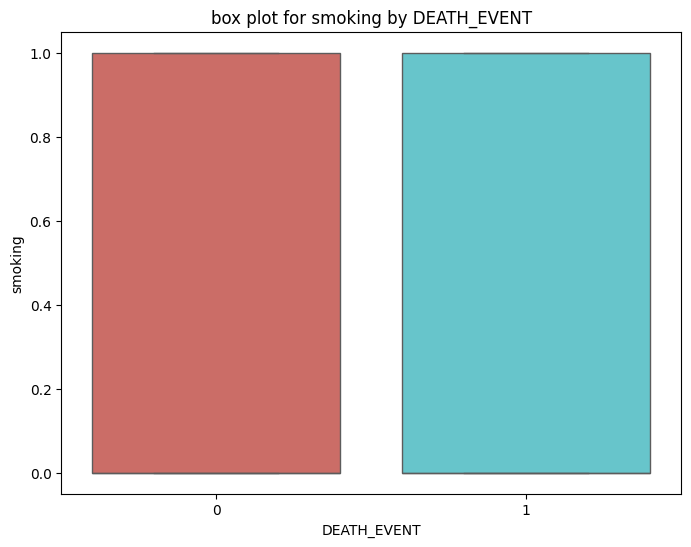

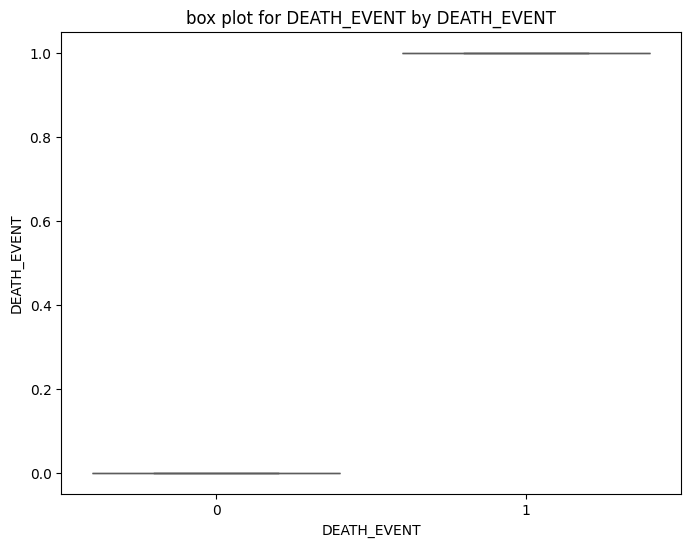

In [34]:
# boxplot for discrete vs discrete
for feature in discrete_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x = target , y = feature ,data = df , palette = 'hls')
    plt.title(f'box plot for {feature} by {target}')
    plt.show()

# there is no significant difference between target and feature so let us try bar plot

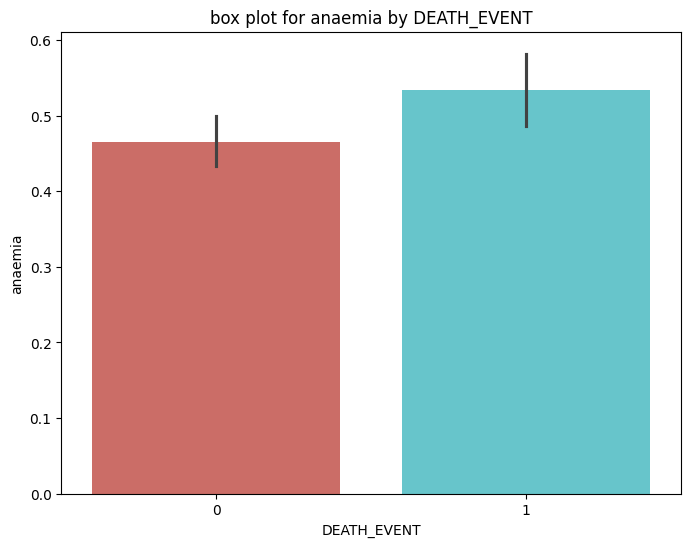

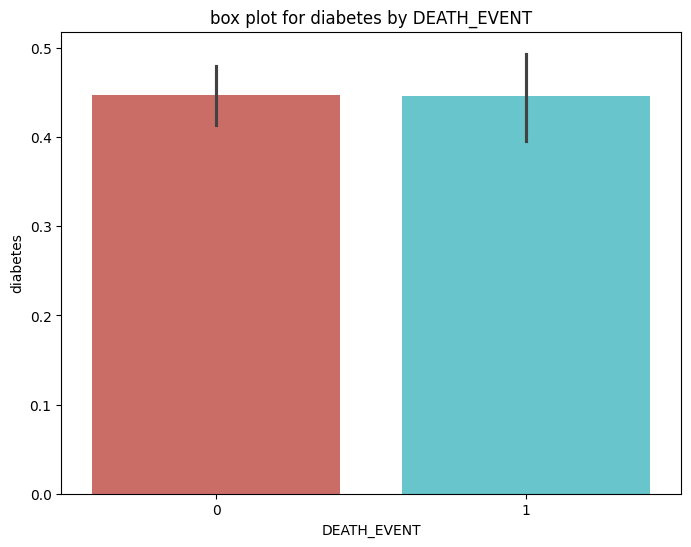

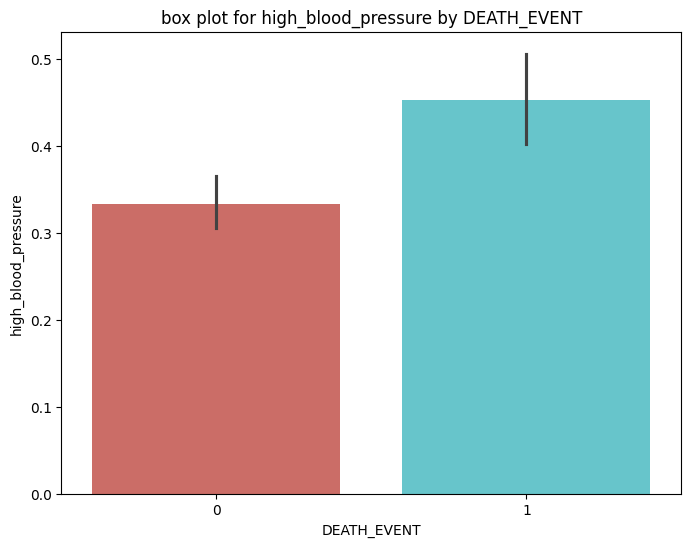

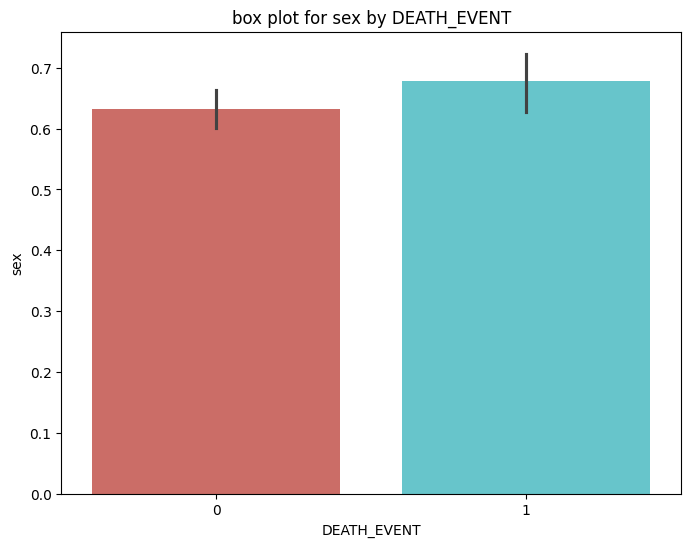

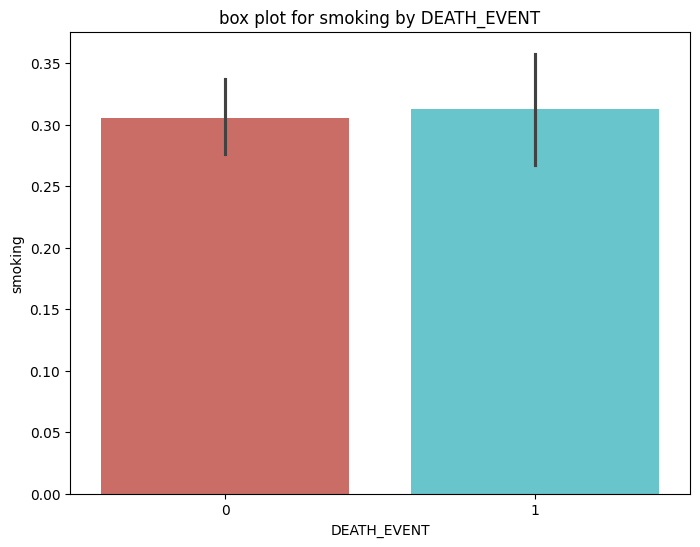

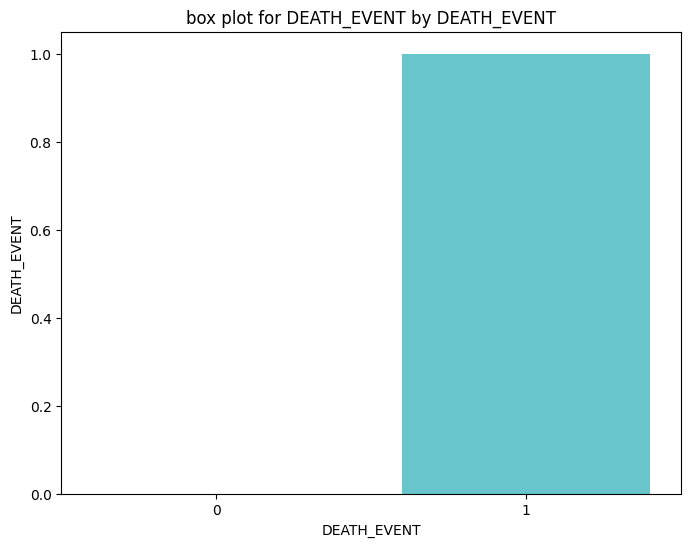

In [35]:
for feature in discrete_features:
    plt.figure(figsize=(8,6))
    sns.barplot(x = target , y = feature ,data = df , palette = 'hls')
    plt.title(f'box plot for {feature} by {target}')
    plt.show()
# there will be a slight difference and only bar plot can be made on dis vs dis

# discrete vs continuos
# x axis = discrete
# y axis = continuos

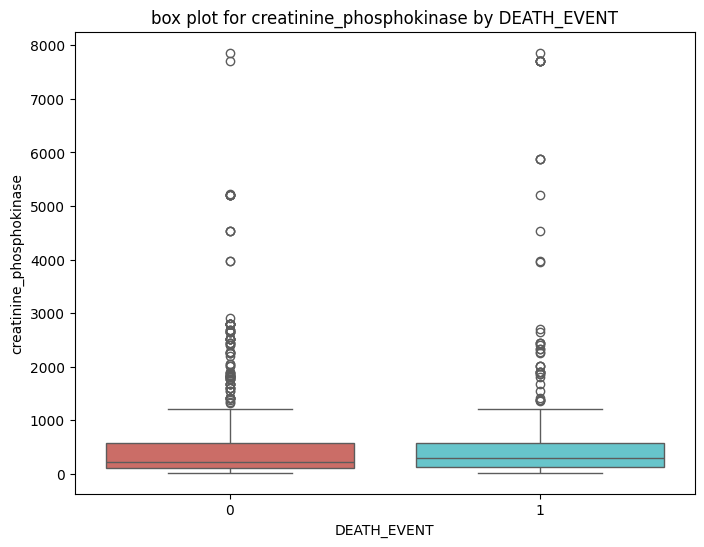

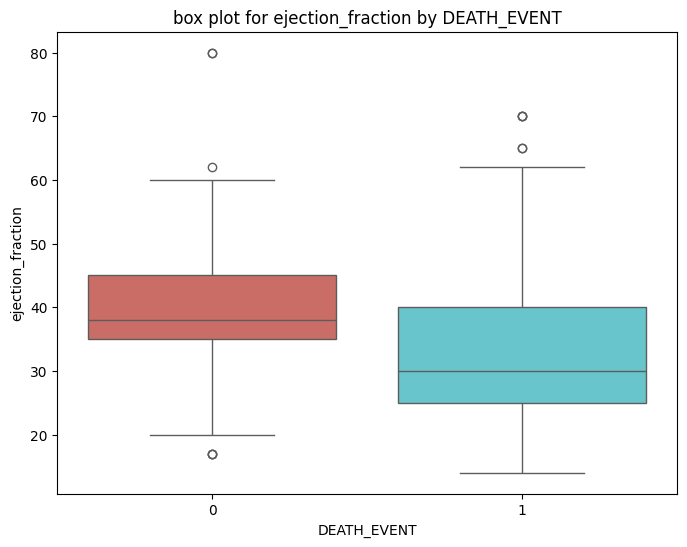

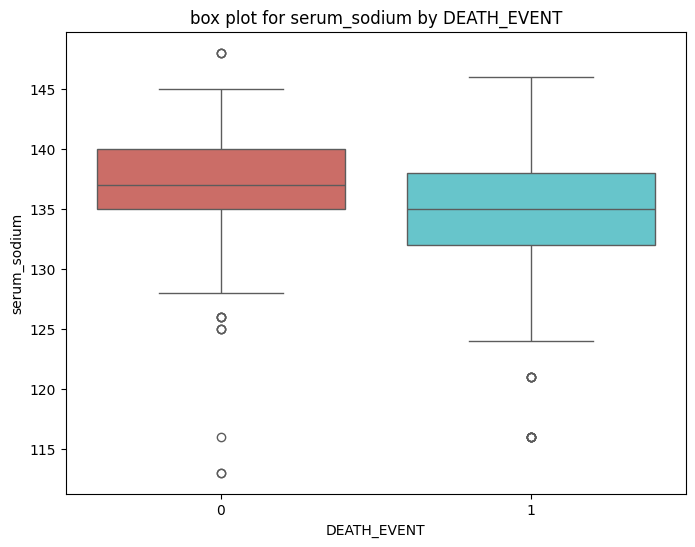

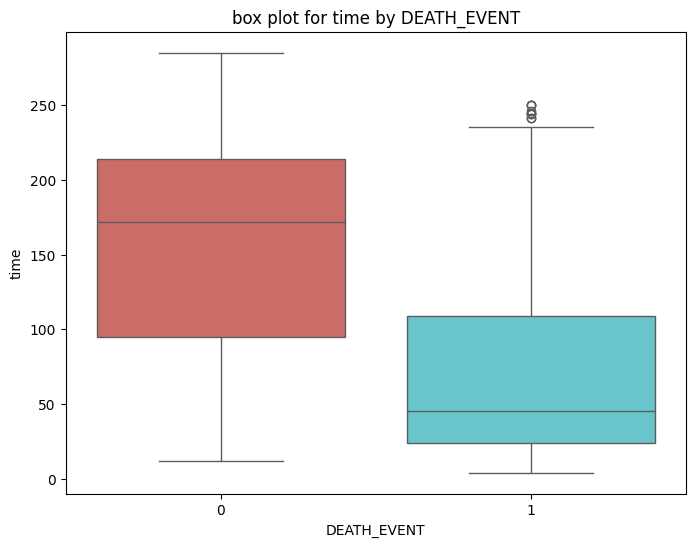

In [36]:
for feature in continuous_features:
    plt.figure(figsize=(8,6))
    sns.boxplot(x = target , y = feature ,data = df , palette = 'hls')
    plt.title(f'box plot for {feature} by {target}')
    plt.show()

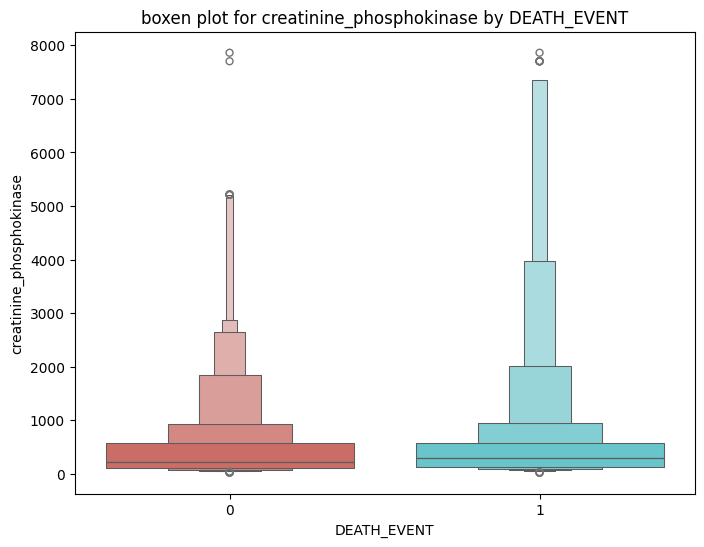

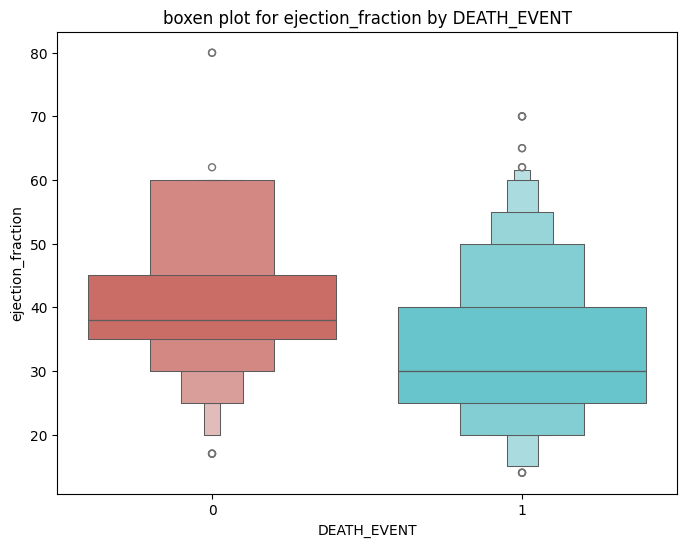

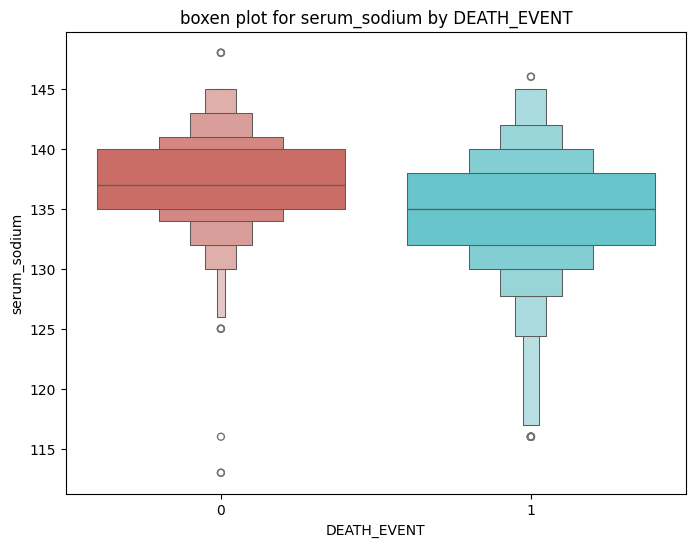

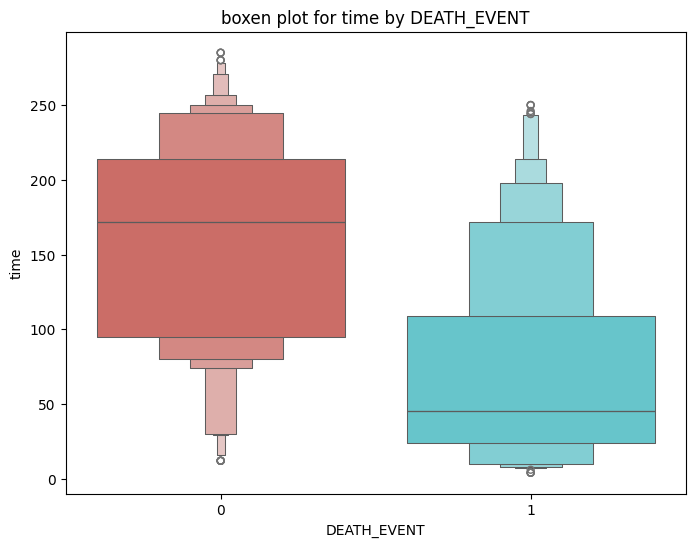

In [37]:

for feature in continuous_features:
    plt.figure(figsize=(8,6))
    sns.boxenplot(x = target , y = feature ,data = df , palette = 'hls')
    plt.title(f'boxen plot for {feature} by {target}')
    plt.show()

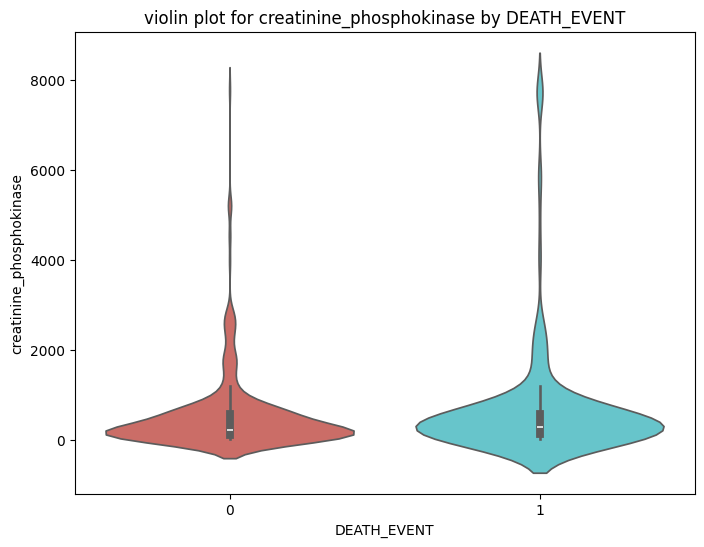

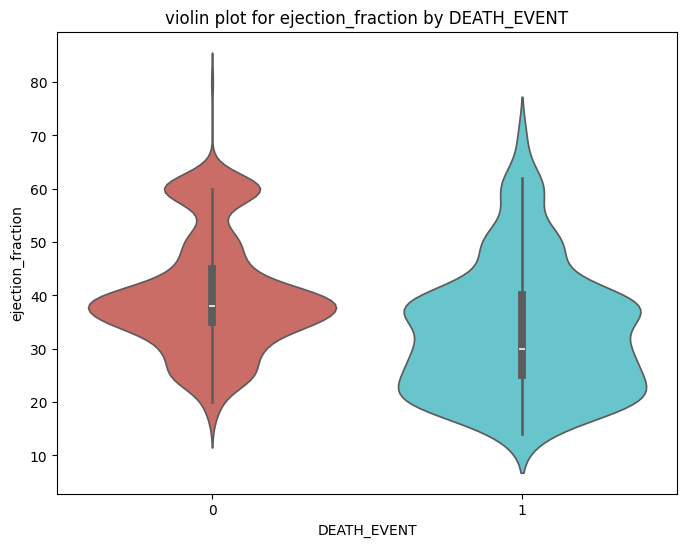

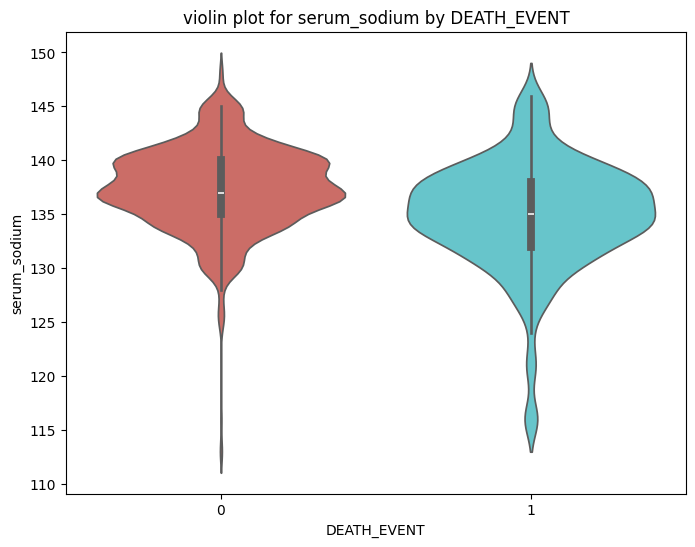

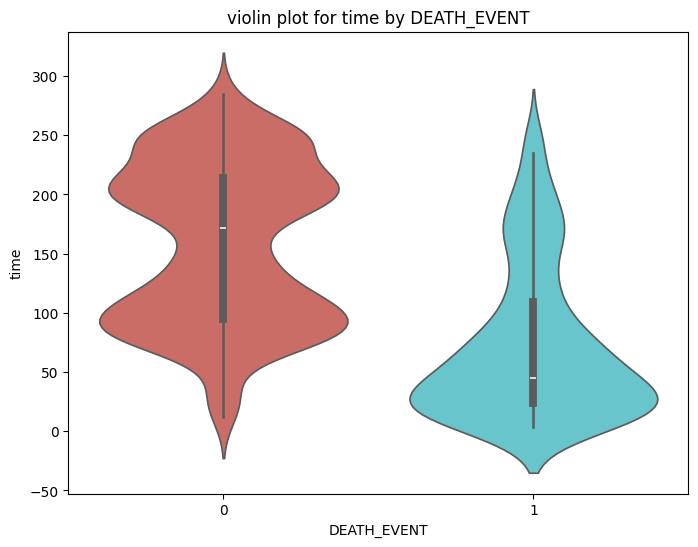

In [38]:
for feature in continuous_features:
    plt.figure(figsize=(8,6))
    sns.violinplot(x = target , y = feature ,data = df , palette = 'hls')
    plt.title(f'violin plot for {feature} by {target}')
    plt.show()

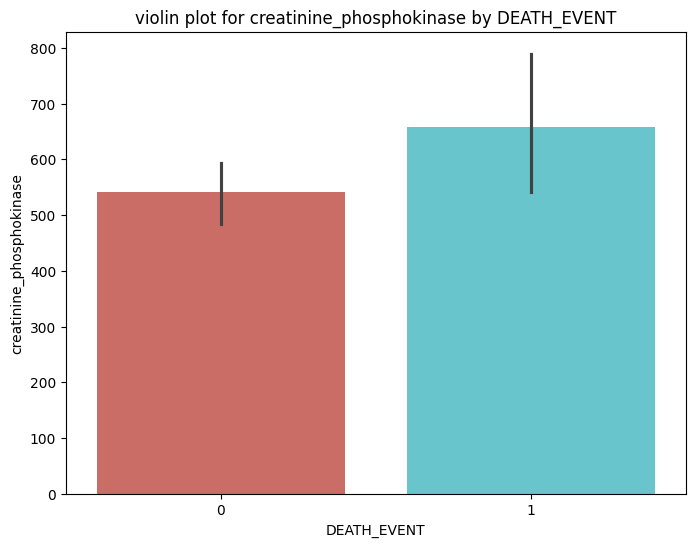

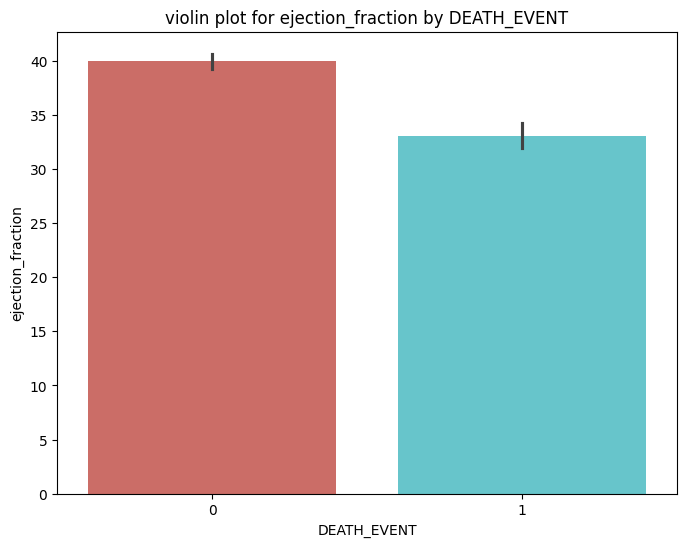

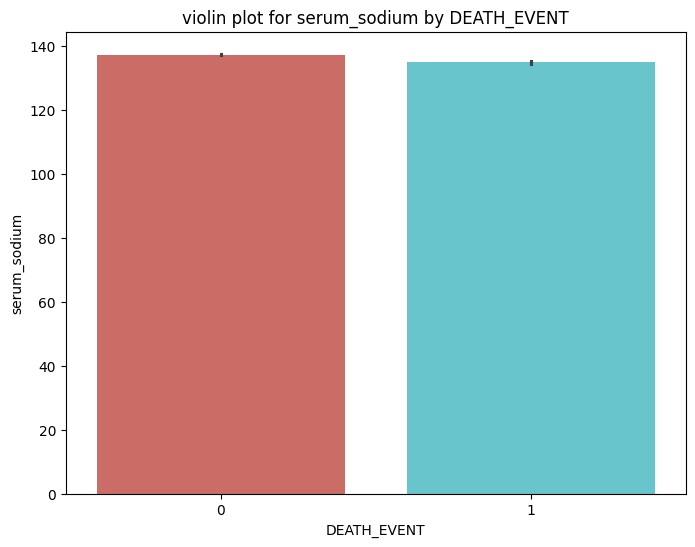

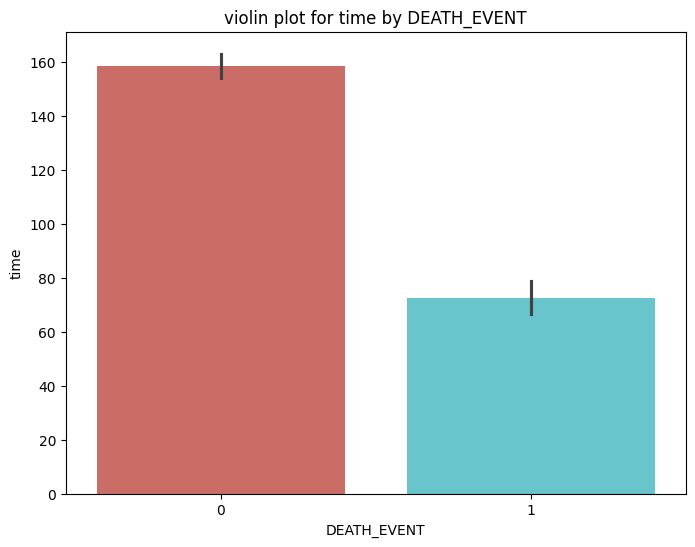

In [39]:
for feature in continuous_features:
    plt.figure(figsize=(8,6))
    sns.barplot(x = target , y = feature ,data = df , palette = 'hls')
    plt.title(f'violin plot for {feature} by {target}')
    plt.show()

# continuous vs continuos (scatter plot and line plot)

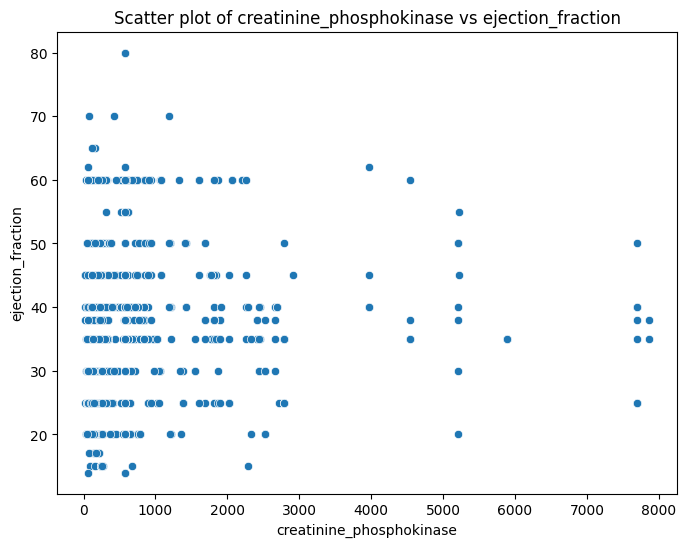

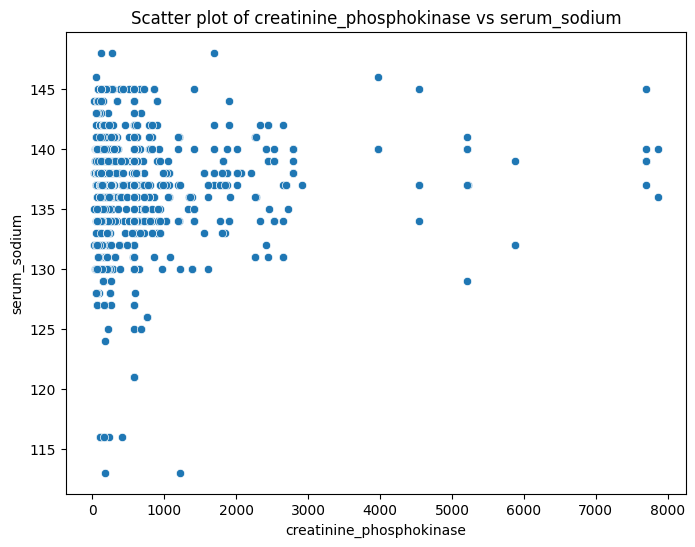

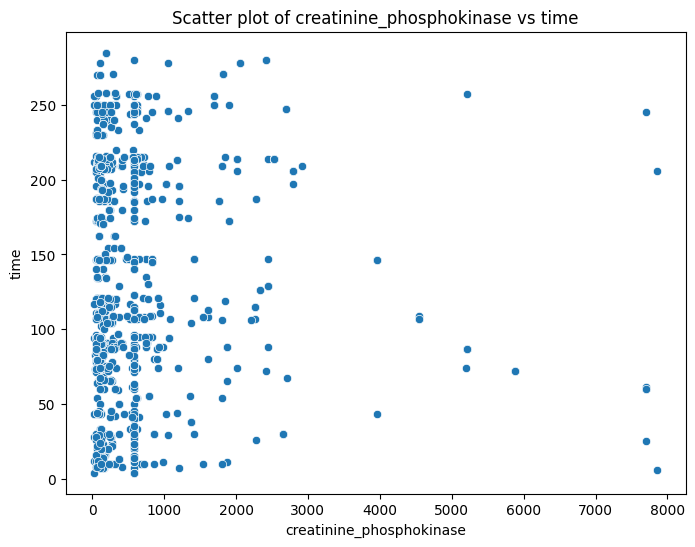

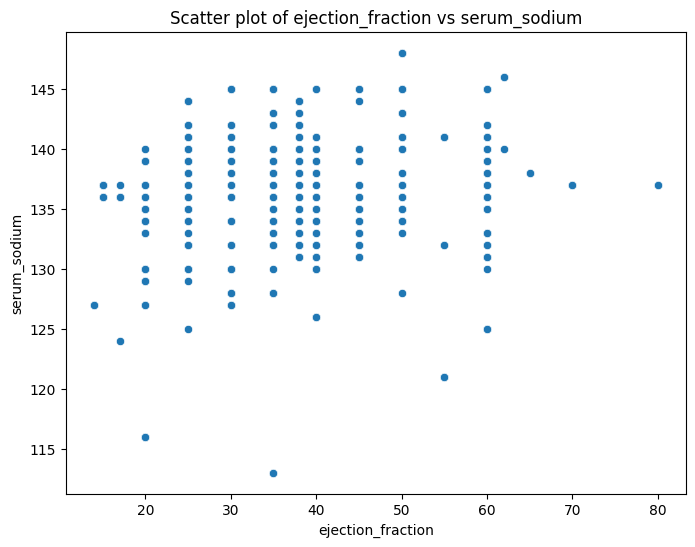

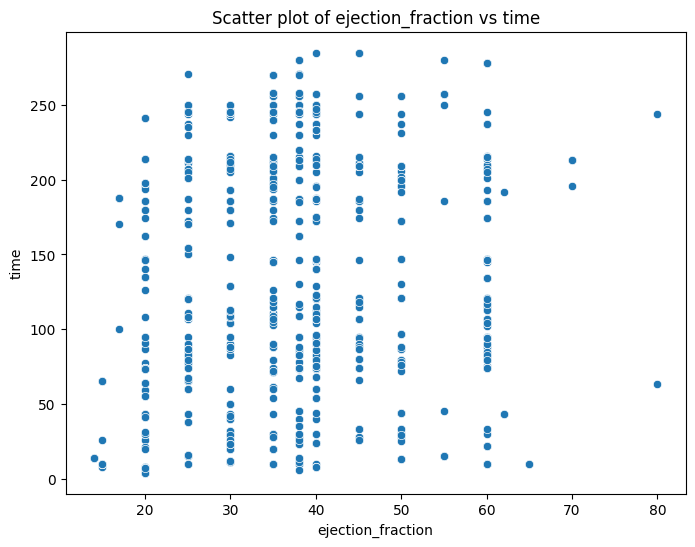

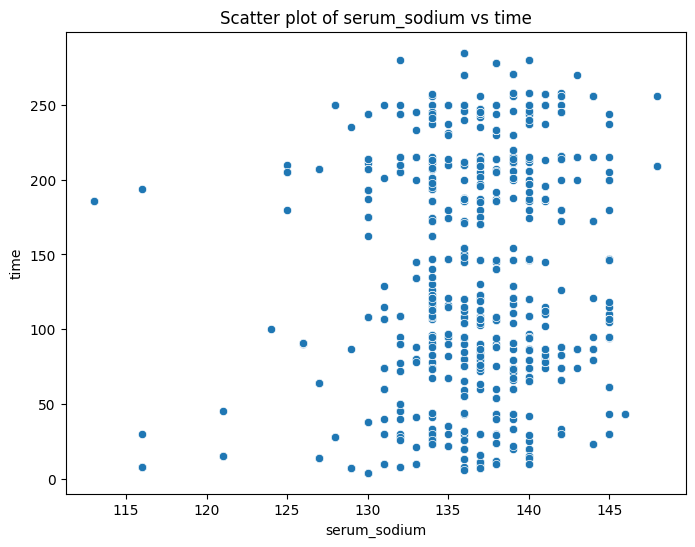

In [40]:
for i in range(len(continuous_features)):
    for j in range(i+1 , len(continuous_features)):
        plt.figure(figsize = (8,6))
        sns.scatterplot(x = continuous_features[i] , y = continuous_features[j] , data = df , palette = 'hls')
        plt.title(f'Scatter plot of {continuous_features[i]} vs {continuous_features[j]}')
        plt.show()

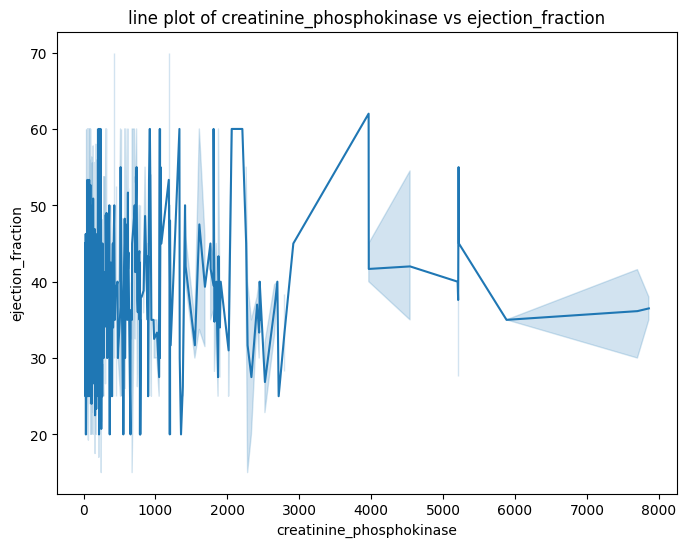

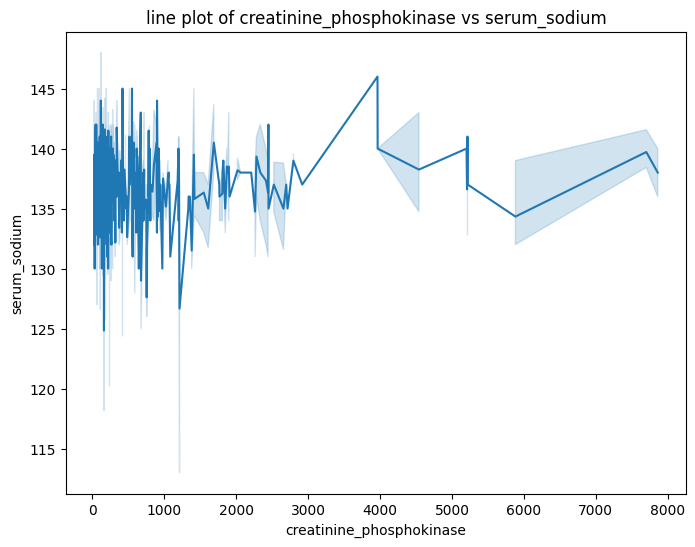

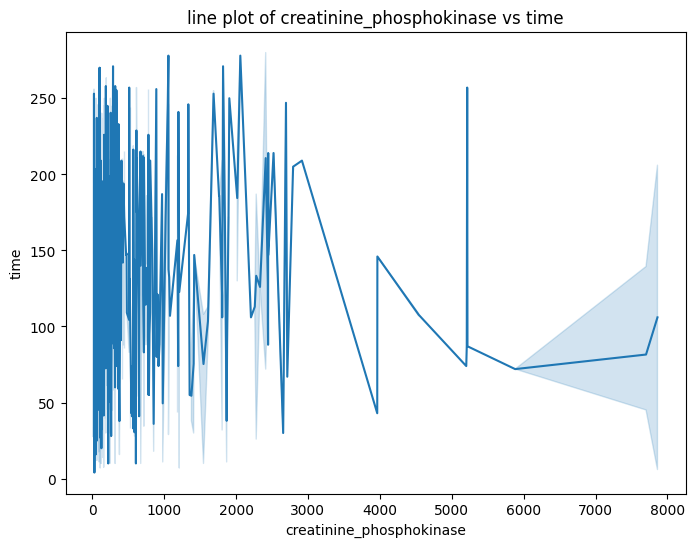

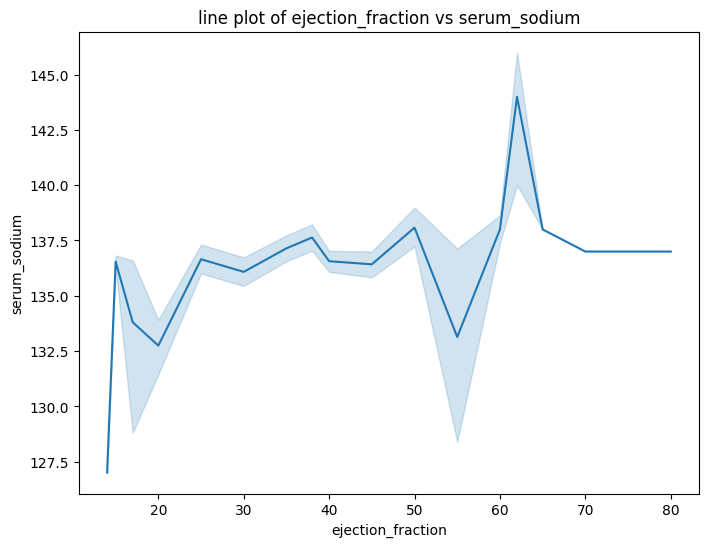

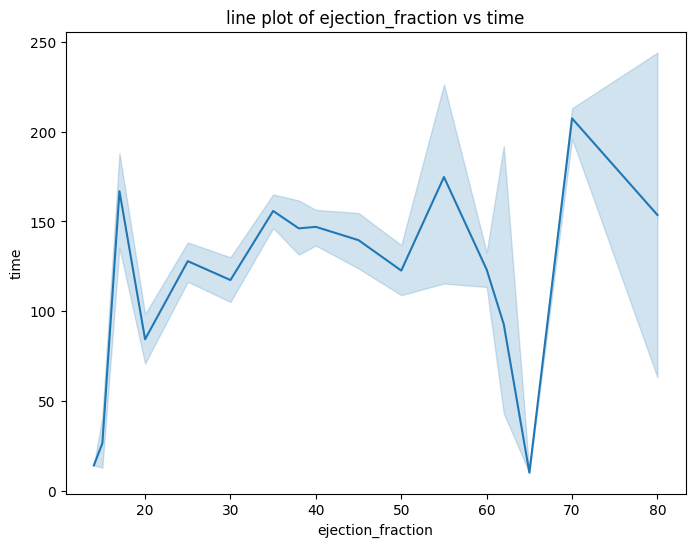

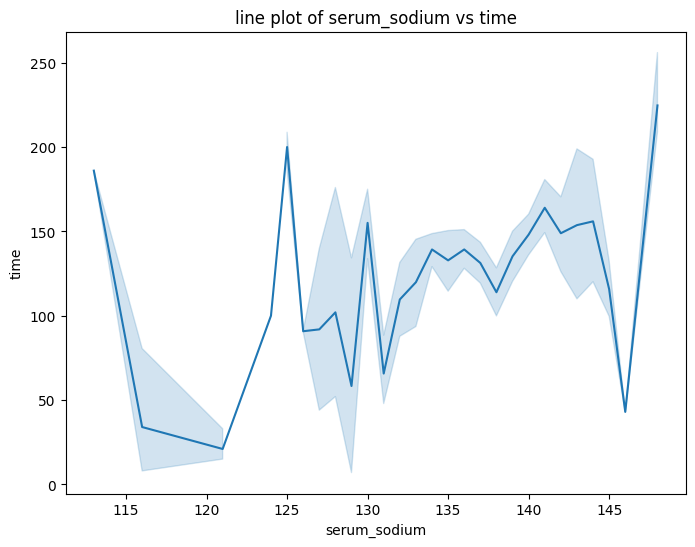

In [41]:
for i in range(len(continuous_features)):
    for j in range(i+1 , len(continuous_features)):
        plt.figure(figsize = (8,6))
        sns.lineplot(x = continuous_features[i] , y = continuous_features[j] , data = df , palette = 'hls')
        plt.title(f'line plot of {continuous_features[i]} vs {continuous_features[j]}')
        plt.show()

# none of them showing corelation with each other

# find the correlation matrix

In [42]:
correlation_matrix = df.corr()

In [43]:
correlation_matrix

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.108039,-0.098890,-0.077437,0.057771,0.122868,-0.009855,0.197325,-0.044933,0.059648,0.022495,-0.198010,0.224602
anaemia,0.108039,1.000000,-0.200294,0.031989,0.024339,0.047177,-0.006089,0.003655,-0.003755,-0.037188,-0.056350,-0.097733,0.063510
creatinine_phosphokinase,-0.098890,-0.200294,1.000000,-0.042517,0.002157,-0.004945,0.015418,-0.018248,0.047212,0.061105,-0.002144,0.019553,0.055221
diabetes,-0.077437,0.031989,-0.042517,1.000000,0.012477,-0.038261,0.044104,-0.063715,-0.095644,-0.149128,-0.222771,0.008653,-0.001485
ejection_fraction,0.057771,0.024339,0.002157,0.012477,1.000000,0.049202,0.083884,-0.060202,0.194937,-0.143921,0.002126,0.086484,-0.271767
high_blood_pressure,0.122868,0.047177,-0.004945,-0.038261,0.049202,1.000000,-0.004260,0.013098,0.037283,-0.065553,-0.078545,-0.219173,0.113721
platelets,-0.009855,-0.006089,0.015418,0.044104,0.083884,-0.004260,1.000000,0.023062,0.065051,-0.090300,0.043759,-0.001018,-0.044523
serum_creatinine,0.197325,0.003655,-0.018248,-0.063715,-0.060202,0.013098,0.023062,1.000000,-0.263781,0.037234,0.020209,-0.165679,0.290229
serum_sodium,-0.044933,-0.003755,0.047212,-0.095644,0.194937,0.037283,0.065051,-0.263781,1.000000,-0.047862,0.011111,0.130820,-0.250990
sex,0.059648,-0.037188,0.061105,-0.149128,-0.143921,-0.065553,-0.090300,0.037234,-0.047862,1.000000,0.411603,0.017673,0.044045


# heat map of the above data

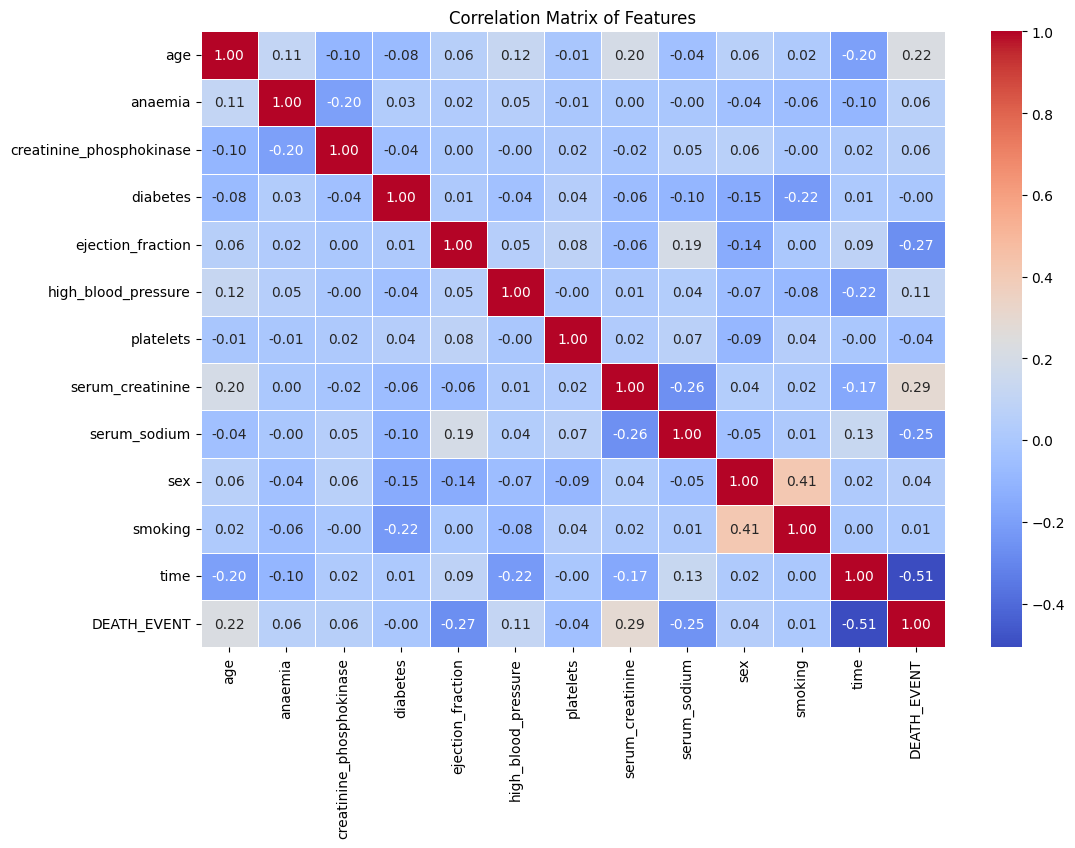

In [44]:
plt.figure(figsize = (12,8))
sns.heatmap(correlation_matrix , annot = True , cmap = 'coolwarm' , fmt = '.2f' , linewidths = 0.5)
plt.title('Correlation Matrix of Features')
plt.show()

# features must be least correlated to each other , if there are highle corelated(60%) drop them

# chech how the correlation of the feature corespond with the target

In [45]:
correlation_with_target = df.corr()[target]

In [46]:
correlation_with_target

age                         0.224602
anaemia                     0.063510
creatinine_phosphokinase    0.055221
diabetes                   -0.001485
ejection_fraction          -0.271767
high_blood_pressure         0.113721
platelets                  -0.044523
serum_creatinine            0.290229
serum_sodium               -0.250990
sex                         0.044045
smoking                     0.006774
time                       -0.507374
DEATH_EVENT                 1.000000
Name: DEATH_EVENT, dtype: float64

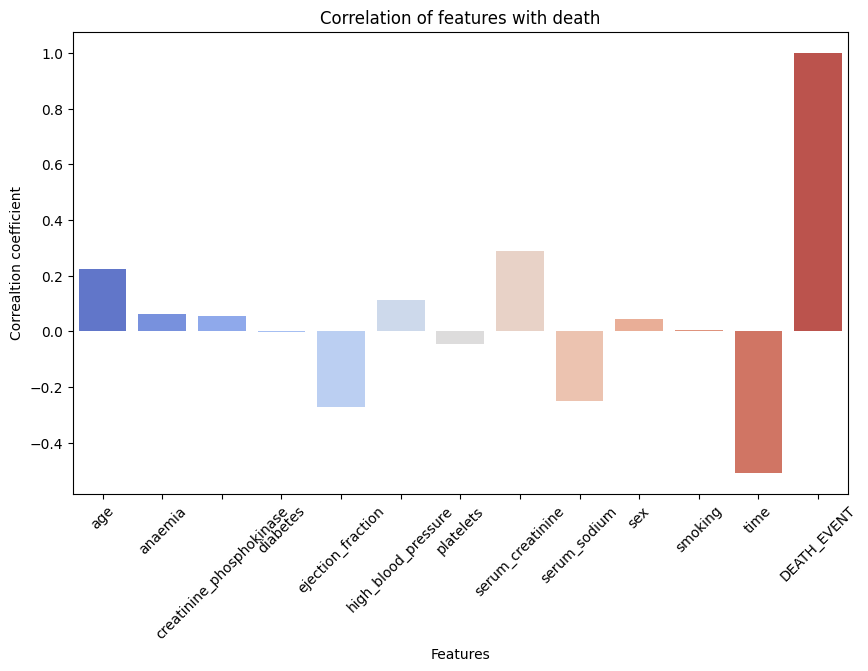

In [47]:
plt.figure(figsize = (10,6))
sns.barplot(x = correlation_with_target.index , y = correlation_with_target.values , palette = 'coolwarm')
plt.title('Correlation of features with death')
plt.ylabel('Correaltion coefficient')
plt.xlabel('Features')
plt.xticks(rotation = 45)
plt.show()

In [48]:
pivot_table = pd.pivot_table(df , index = 'anaemia' , columns = 'smoking' , values = 'DEATH_EVENT' , aggfunc = 'mean')

In [49]:
pivot_table

smoking,0,1
anaemia,,
0,0.280353,0.256637
1,0.316703,0.366667


In [50]:
pivot_table = pd.pivot_table(df , index = 'anaemia' , columns = 'smoking' , values = 'age' , aggfunc = 'mean')

In [51]:
pivot_table

smoking,0,1
anaemia,,
0,58.825607,60.362832
1,61.964579,61.775928


In [52]:
pivot_table = pd.pivot_table(df , index = 'DEATH_EVENT' , columns = 'anaemia' , values = 'age' , aggfunc = 'mean')

In [53]:
pivot_table

anaemia,0,1
DEATH_EVENT,,
0,57.870445,59.941734
1,63.254054,65.897802


# cross - tabulation

In [54]:
cross_tabulation_table = pd.crosstab(df['DEATH_EVENT'] , df['anaemia'])
print("Cross-tabulation of DEATH_EVENT and anaemia : \n" , cross_tabulation_table)

Cross-tabulation of DEATH_EVENT and anaemia : 
 anaemia        0    1
DEATH_EVENT          
0            494  429
1            185  212


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [56]:
x = df_new.drop('DEATH_EVENT' , axis = 1)
y = df_new['DEATH_EVENT']

In [57]:
x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2 ,stratify = y , random_state = 42)

# we need to use one algorithm i.e, SMOT
# s = Synthetic , m = minority , o = oversampling , te = technique

In [58]:
from imblearn.over_sampling import SMOTE

In [59]:
smote = SMOTE()
x_train_resampled , y_train_resampled = smote.fit_resample(x_train , y_train)

In [60]:
log_reg_model = LogisticRegression()

In [61]:
log_reg_model.fit(x_train_resampled , y_train_resampled)

LogisticRegression()

# test accuracy using logreg

In [62]:
y_pred_test = log_reg_model.predict(x_test)
log_reg_accuracy = accuracy_score(y_test , y_pred_test)
print("LogisticRegression test accuracy:" ,log_reg_accuracy)

LogisticRegression test accuracy: 0.7462121212121212


# train accuracy using logreg

In [63]:
y_pred_train = log_reg_model.predict(x_train)
train_accuracy = accuracy_score(y_train , y_pred_train)
print("LogisticRegression accuracy:" ,train_accuracy)

LogisticRegression accuracy: 0.7888257575757576


In [64]:
rf_model = RandomForestClassifier()
rf_model.fit(x_train_resampled , y_train_resampled)

RandomForestClassifier()

# test accuracy using random forest

In [65]:
rf_pred = rf_model.predict(x_test)
rf_accuracy = accuracy_score(y_test ,rf_pred )
print("RandomForestClassifier test accuracy:" , rf_accuracy)

RandomForestClassifier test accuracy: 0.9583333333333334


# train accuracy using random forest

In [66]:
y_pred_train = rf_model.predict(x_train)
train_accuracy = accuracy_score(y_train , y_pred_train)
print("RandomForestClassifier train accuracy:" , train_accuracy)

RandomForestClassifier train accuracy: 1.0


In [67]:
dt_model = DecisionTreeClassifier()
dt_model.fit(x_train_resampled,y_train_resampled)

DecisionTreeClassifier()

# test accuracy using decision tree

In [68]:
dt_pred = dt_model.predict(x_test)
dt_accuracy = accuracy_score(y_test , dt_pred)
print("DecisionTreeClassifier test accuracy:" , dt_accuracy)

DecisionTreeClassifier test accuracy: 0.928030303030303


# train accuracy using decision tree

In [69]:
y_pred_train = dt_model.predict(x_train)
train_accuracy = accuracy_score(y_train , y_pred_train)
print("DecisionTreeClassifier train accuracy:" , dt_accuracy)

DecisionTreeClassifier train accuracy: 0.928030303030303


In [70]:
svm_model = SVC()
svm_model.fit(x_train_resampled,y_train_resampled)

SVC()

# test accuracy using SVC (default = radial bias) 

In [71]:
svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test , svm_pred)
print("SVC test accuracy:" , svm_accuracy)

SVC test accuracy: 0.6363636363636364


# train accuracy using SVC (default = radial bias)

In [72]:
y_pred_train = svm_model.predict(x_train)
svm_accuracy = accuracy_score(y_train , y_pred_train)
print("SVC train accuracy:" , svm_accuracy)

SVC train accuracy: 0.6268939393939394


# test accuracy using SVC (kernel = linear since traget is binary classication)

In [73]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x_train_resampled,y_train_resampled)

SVC(kernel='linear')

In [74]:
svm_pred = svm_model.predict(x_test)
svm_accuracy = accuracy_score(y_test , svm_pred)
print("SVC test accuracy:" , svm_accuracy)

SVC test accuracy: 0.7272727272727273


In [75]:
y_pred_train = svm_model.predict(x_train)
svm_accuracy = accuracy_score(y_train , y_pred_train)
print("SVC train accuracy:" , svm_accuracy)

SVC train accuracy: 0.7651515151515151


# now let us scale the data using standard scaler

In [76]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train_scaled  = scaler.fit_transform(x_train_resampled[['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']])
x_test_scaled = scaler.transform(x_test[['creatinine_phosphokinase', 'ejection_fraction', 'serum_sodium', 'time']])


In [77]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(x_train_scaled , y_train_resampled)

SVC(kernel='linear')

In [78]:
svm_pred = svm_model.predict(x_test_scaled)
svm_accuracy = accuracy_score(y_test , svm_pred)
print("SVC test accuracy:" , svm_accuracy)

SVC test accuracy: 0.7727272727272727


In [79]:
y_pred_train = svm_model.predict(x_train_scaled)
svm_accuracy = accuracy_score(y_train_resampled , y_pred_train)
print("SVC train accuracy:" , svm_accuracy)

SVC train accuracy: 0.7981029810298103


# after Scaling accuracy increased so there is a demand whenever you give data kindly scale it

# comparative plot on test accuracies beacuse they are the unseen/ invincible data

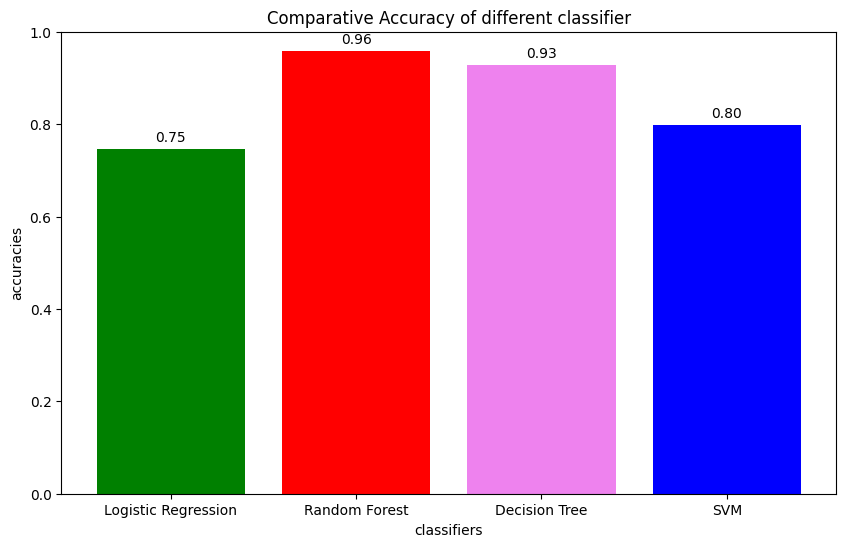

In [80]:
classifiers = ['Logistic Regression', 'Random Forest', 'Decision Tree', 'SVM']
accuracies = [log_reg_accuracy , rf_accuracy , dt_accuracy , svm_accuracy]
plt.figure(figsize = (10,6))
plt.bar(classifiers , accuracies , color = ['green','red','violet','blue'])
plt.title("Comparative Accuracy of different classifier")
plt.xlabel('classifiers')
plt.ylabel('accuracies')
for i , accuracy in enumerate(accuracies):
    plt.text(i , accuracy+0.01 , f'{accuracy:.2f}' , ha = 'center' , va = 'bottom')
plt.ylim(0,1)
plt.show()

In [81]:
from sklearn import tree

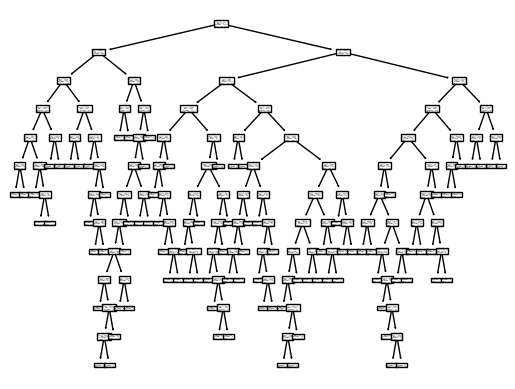

In [82]:
tree.plot_tree(dt_model)
plt.show()

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Assuming y_test contains true labels and y_pred_<model> contains predictions for each model
models = {
    "Logistic Regression": logistic_model,
    "Decision Tree": decision_tree_model,
    "Random Forest": random_forest_model,
    "SVM": svm_model
}

# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Compute metrics for each model
for model_name, model in models.items():
    y_pred = model.predict(x_test)  # Get predictions
    
    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred))
    recall_scores.append(recall_score(y_test, y_pred))
    f1_scores.append(f1_score(y_test, y_pred))

# Create a bar width and index for each metric
bar_width = 0.2
index = np.arange(len(models))

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(index, accuracy_scores, bar_width, label="Accuracy", color="blue")
plt.bar(index + bar_width, precision_scores, bar_width, label="Precision", color="green")
plt.bar(index + 2 * bar_width, recall_scores, bar_width, label="Recall", color="orange")
plt.bar(index + 3 * bar_width, f1_scores, bar_width, label="F1-Score", color="red")

# Formatting
plt.xlabel("Models")
plt.ylabel("Score")
plt.title("Model Performance Comparison")
plt.xticks(index + 1.5 * bar_width, models.keys())
plt.ylim(0, 1)  # Scale between 0 and 1
plt.legend()
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show plot
plt.show()


NameError: name 'logistic_model' is not defined

# deployment of the model

In [ ]:
import pickle
with open('rf_model_heart.pkl' , 'wb') as file:
    pickle.dump(rf_model , file) # dump file is a file which contains information that the machine has learnt which we cant understand

In [ ]:
import sys
python_version = sys.version
numpy_version = np.__version__
pandas_version = pd.__version__

print(f"Python version: {python_version}")
print(f"NumPy version: {numpy_version}")
print(f"Pandas version: {pandas_version}")


In [ ]:
import sklearn
print("Scikit-learn Version:" , sklearn.__version__)